In [62]:
import pandas as pd

# Loading the datasets
crude_oil_data = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_crude_oil_2017_2023.csv')
nat_gas_data = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_nat_gas_2017_2023.csv')
rbob_gasoline_data = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_rbob_gasoline.csv')

# Displaying the first few rows of each dataset
crude_oil_head = crude_oil_data.head()
nat_gas_head = nat_gas_data.head()
rbob_gasoline_head = rbob_gasoline_data.head()

crude_oil_head, nat_gas_head, rbob_gasoline_head


(         Date       Open       High        Low      Close  Adj Close  Volume
 0  2017-01-03  54.000000  55.250000  52.125000  52.325001  52.325001   16301
 1  2017-01-04  52.500000  53.450001  52.150002  53.250000  53.250000   10277
 2  2017-01-05  53.375000  54.099998  52.775002  53.750000  53.750000   11492
 3  2017-01-06  53.750000  54.299999  53.325001  54.000000  54.000000    8955
 4  2017-01-09  53.724998  53.825001  51.750000  51.950001  51.950001    8853,
          Date   Open  High    Low  Close  Adj Close  Volume
 0  2017-01-03  3.580  3.58  3.270  3.325      3.325    3055
 1  2017-01-04  3.320  3.36  3.240  3.265      3.265    2114
 2  2017-01-05  3.255  3.34  3.175  3.275      3.275    2418
 3  2017-01-06  3.300  3.36  3.210  3.285      3.285    1880
 4  2017-01-09  3.240  3.27  3.095  3.105      3.105    1472,
          Date    Open   High     Low  Close  Adj Close  Volume
 0  2017-01-03  1.6218  1.622  1.6218  1.622      1.622       1
 1  2017-01-04  1.6459  1.646  1.645

Getting Started

Uploading the Data and the Contents of the Data:

This step involves importing the necessary datasets and understanding the structure, columns, and initial observations of the data.

E-Mini Brent Crude
E-Mini Natural Gas
E-Mini RBOB Gasoline

2017-2023 Daily Data

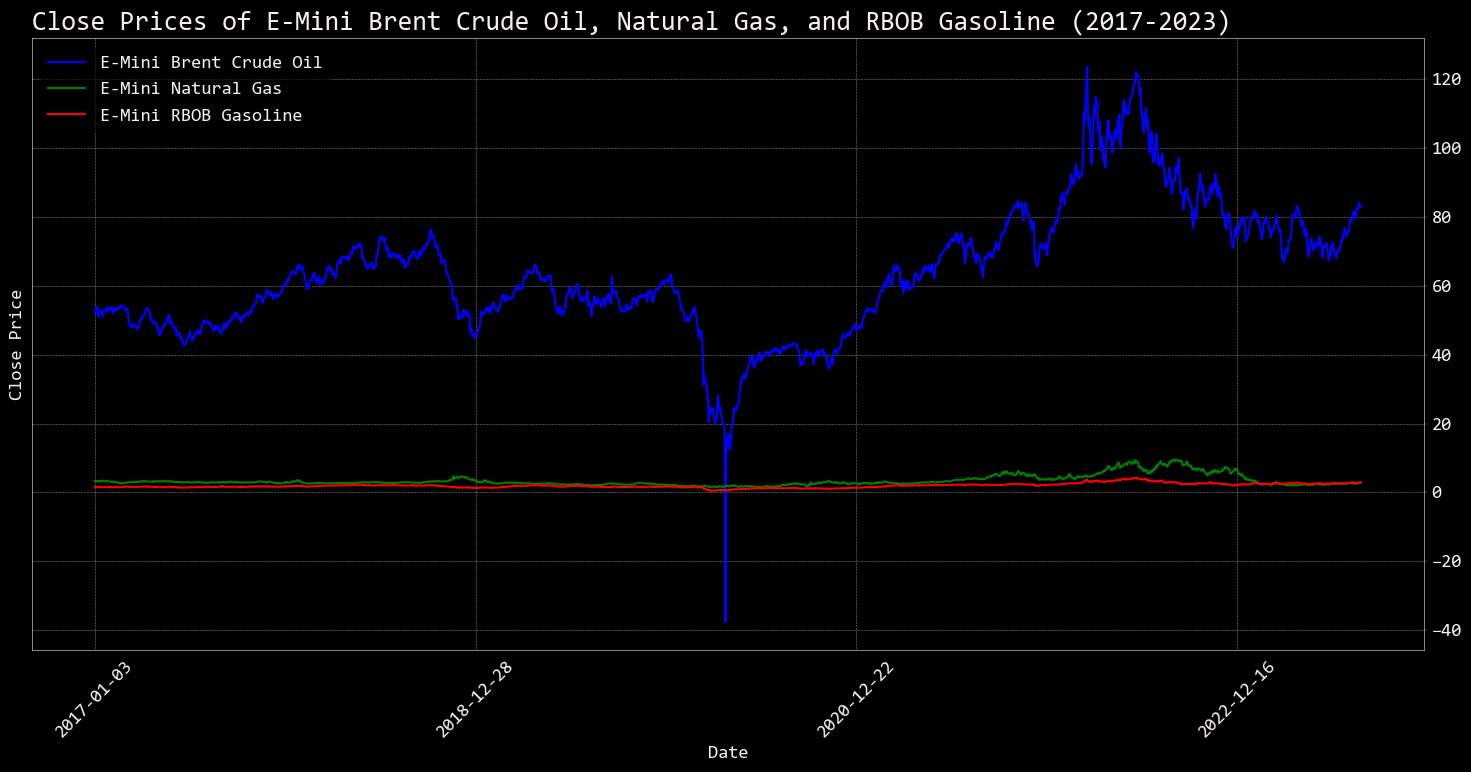

In [63]:
#Visual Inspection
#Here's the visual representation of the Close prices for the three assets:


import matplotlib.pyplot as plt

# Plotting the time series prices on a single graph
plt.figure(figsize=(15, 8))
plt.plot(crude_oil_data['Date'], crude_oil_data['Close'], label='E-Mini Brent Crude Oil', color='blue')
plt.plot(nat_gas_data['Date'], nat_gas_data['Close'], label='E-Mini Natural Gas', color='green')
plt.plot(rbob_gasoline_data['Date'], rbob_gasoline_data['Close'], label='E-Mini RBOB Gasoline', color='red')

# Setting labels, title and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of E-Mini Brent Crude Oil, Natural Gas, and RBOB Gasoline (2017-2023)')
plt.legend()
plt.xticks(crude_oil_data['Date'][::500], rotation=45)  # Display every 500th date for clarity
plt.tight_layout()

plt.show()


Visual Inspection:

Here, the time series prices of assets are plotted on a single graph. This visual representation helps in identifying if the asset prices move in tandem or have any noticeable patterns.

Here's the visual representation of the Close prices for the three assets:


E-Mini Brent Crude Oil (Blue)

E-Mini Natural Gas (Green)

E-Mini RBOB Gasoline (Red)


From the plot, we can observe that there are some periods where all three assets move in the same direction, but there are also periods where they diverge.

In [64]:
#2. Pearson Correlation Coefficient
#Pearson correlation coefficient between each pair of asset price series. This will provide a numerical measure of how strongly each pair of assets is correlated.

# Aligning the datasets by 'Date' for correlation calculations
merged_data = pd.merge(crude_oil_data, nat_gas_data, on='Date', suffixes=('_oil', '_nat_gas'))
merged_data = pd.merge(merged_data, rbob_gasoline_data, on='Date')

# Calculate Pearson correlation coefficient between each pair of asset price series
correlation_matrix = merged_data[['Close_oil', 'Close_nat_gas', 'Close']].corr()

correlation_matrix


,Close_oil,Close_nat_gas,Close
Close_oil,1.000000,0.729700,0.965527
Close_nat_gas,0.729700,1.000000,0.692967
Close,0.965527,0.692967,1.000000


Pearson Correlation Coefficient:

This is a measure of the linear correlation between two variables. A value close to 1 implies a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value near 0 suggests a weak or no linear correlation.

The Pearson correlation coefficients between the Close prices of the assets are as follows:


E-Mini Brent Crude Oil and E-Mini Natural Gas: 


0.7297

E-Mini Brent Crude Oil and E-Mini RBOB Gasoline: 


0.9655


E-Mini Natural Gas and E-Mini RBOB Gasoline: 


0.6930


These values indicate a strong positive correlation between the assets, especially between Brent Crude Oil and RBOB Gasoline.



Rolling Window Correlation:

This involves calculating the correlation between asset prices over a specified window of time, which then moves (or "rolls") forward by one observation at a time. It helps in understanding if correlations are consistent or if they change over time.

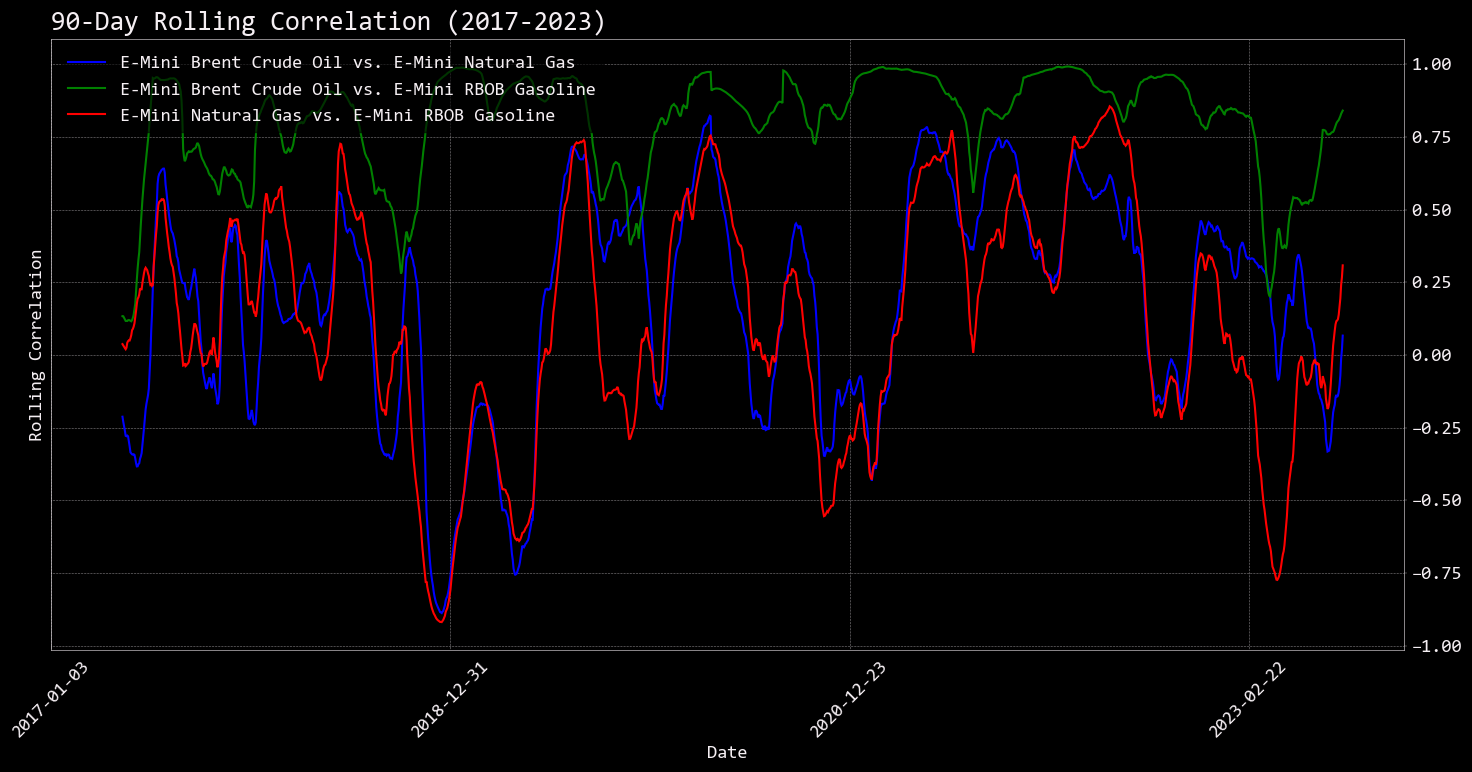

In [65]:
#3. Rolling Window Correlation
# Rolling window correlation over time to see if these correlations are stable or if they change. We'll use a window size of 90 days (approximately 3 months) to calculate the rolling correlations. We'll then plot these rolling correlations over time.

# Setting the window size for rolling correlation
window_size = 90

# Calculating rolling correlations
rolling_corr_oil_nat_gas = merged_data['Close_oil'].rolling(window_size).corr(merged_data['Close_nat_gas'])
rolling_corr_oil_gasoline = merged_data['Close_oil'].rolling(window_size).corr(merged_data['Close'])
rolling_corr_nat_gas_gasoline = merged_data['Close_nat_gas'].rolling(window_size).corr(merged_data['Close'])

# Plotting the rolling correlations
plt.figure(figsize=(15, 8))

plt.plot(merged_data['Date'], rolling_corr_oil_nat_gas, label='E-Mini Brent Crude Oil vs. E-Mini Natural Gas', color='blue')
plt.plot(merged_data['Date'], rolling_corr_oil_gasoline, label='E-Mini Brent Crude Oil vs. E-Mini RBOB Gasoline', color='green')
plt.plot(merged_data['Date'], rolling_corr_nat_gas_gasoline, label='E-Mini Natural Gas vs. E-Mini RBOB Gasoline', color='red')

# Setting labels, title and legend
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('90-Day Rolling Correlation (2017-2023)')
plt.legend()
plt.xticks(merged_data['Date'][::500], rotation=45)  # Display every 500th date for clarity
plt.tight_layout()

plt.show()


Next, we'll compute a rolling window correlation over time to see if these correlations are stable or if they change. We'll use a window size of 90 days (approximately 3 months) to calculate the rolling correlations. We'll then plot these rolling correlations over time.

The plot above displays the 90-day rolling correlations between the three assets:


E-Mini Brent Crude Oil vs. E-Mini Natural Gas (Blue)

E-Mini Brent Crude Oil vs. E-Mini RBOB Gasoline (Green)

E-Mini Natural Gas vs. E-Mini RBOB Gasoline (Red)


From the plot, we can observe that the correlations between the assets are not constant over time. There are periods where the correlations increase or decrease, indicating that the relationships between the assets change over time.

Augmented Dickey-Fuller Test:

This is a statistical test used to determine the presence of unit roots in a time series sample. If a unit root is present, the series is non-stationary, which can affect the validity of statistical inferences made about it.

To check for stationarity, we will run the Augmented Dickey-Fuller (ADF) test on each of the asset's Close price series. This step is essential because non-stationary series need to be differenced before performing a cointegration test. Let's proceed with the ADF test.

In [66]:
#4. Augmented Dickey-Fuller Test
# Checking for Stationarity on each asset's "close" price series. 

from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test on each asset's 'Close' price series
adf_oil = adfuller(merged_data['Close_oil'])
adf_nat_gas = adfuller(merged_data['Close_nat_gas'])
adf_gasoline = adfuller(merged_data['Close'])

adf_results = {
    'E-Mini Brent Crude Oil': {
        'Test Statistic': adf_oil[0],
        'p-value': adf_oil[1],
        'Critical Values': adf_oil[4]
    },
    'E-Mini Natural Gas': {
        'Test Statistic': adf_nat_gas[0],
        'p-value': adf_nat_gas[1],
        'Critical Values': adf_nat_gas[4]
    },
    'E-Mini RBOB Gasoline': {
        'Test Statistic': adf_gasoline[0],
        'p-value': adf_gasoline[1],
        'Critical Values': adf_gasoline[4]
    }
}

adf_results



{'E-Mini Brent Crude Oil': {'Test Statistic': -1.701099715372047,
  'p-value': 0.43054595968125814,
  'Critical Values': {'1%': -3.4344055568191085,
   '5%': -2.8633312922744665,
   '10%': -2.5677236466370807}},
 'E-Mini Natural Gas': {'Test Statistic': -2.211351965183988,
  'p-value': 0.20215117742245137,
  'Critical Values': {'1%': -3.434456492389522,
   '5%': -2.8633537744729116,
   '10%': -2.567735618262399}},
 'E-Mini RBOB Gasoline': {'Test Statistic': -1.4338217099338746,
  'p-value': 0.5659585081331269,
  'Critical Values': {'1%': -3.434403043188966,
   '5%': -2.863330182785859,
   '10%': -2.567723055843177}}}

For a series to be considered stationary, the test statistic should be less than the critical values, and the p-value should be less than a significance level (e.g., 0.05). In this case, all the asset price series are not stationary as the test statistics are greater than the critical values, and the p-values are greater than 0.05.

Engle-Granger Method:

This is a two-step method to test for cointegration between two or more time series. Cointegration implies that even if individual series are non-stationary, a linear combination of them can be stationary.

In [67]:
#5. Engle-Granger Method
# First, difference the non-staionary series to make them staionary.

# Differencing the series to make them stationary
merged_data['Diff_Close_oil'] = merged_data['Close_oil'].diff()
merged_data['Diff_Close_nat_gas'] = merged_data['Close_nat_gas'].diff()
merged_data['Diff_Close_gasoline'] = merged_data['Close'].diff()

# Dropping NaN values generated due to differencing
merged_data.dropna(inplace=True)

# Performing Augmented Dickey-Fuller test again on the differenced series
adf_diff_oil = adfuller(merged_data['Diff_Close_oil'])
adf_diff_nat_gas = adfuller(merged_data['Diff_Close_nat_gas'])
adf_diff_gasoline = adfuller(merged_data['Diff_Close_gasoline'])

adf_diff_results = {
    'E-Mini Brent Crude Oil': {
        'Test Statistic': adf_diff_oil[0],
        'p-value': adf_diff_oil[1],
        'Critical Values': adf_diff_oil[4]
    },
    'E-Mini Natural Gas': {
        'Test Statistic': adf_diff_nat_gas[0],
        'p-value': adf_diff_nat_gas[1],
        'Critical Values': adf_diff_nat_gas[4]
    },
    'E-Mini RBOB Gasoline': {
        'Test Statistic': adf_diff_gasoline[0],
        'p-value': adf_diff_gasoline[1],
        'Critical Values': adf_diff_gasoline[4]
    }
}

adf_diff_results


{'E-Mini Brent Crude Oil': {'Test Statistic': -27.75222478309165,
  'p-value': 0.0,
  'Critical Values': {'1%': -3.4344055568191085,
   '5%': -2.8633312922744665,
   '10%': -2.5677236466370807}},
 'E-Mini Natural Gas': {'Test Statistic': -7.825297844444726,
  'p-value': 6.505946104144582e-12,
  'Critical Values': {'1%': -3.434456492389522,
   '5%': -2.8633537744729116,
   '10%': -2.567735618262399}},
 'E-Mini RBOB Gasoline': {'Test Statistic': -29.346670597046288,
  'p-value': 0.0,
  'Critical Values': {'1%': -3.434403043188966,
   '5%': -2.863330182785859,
   '10%': -2.567723055843177}}}

After differencing, here are the results of the Augmented Dickey-Fuller (ADF) test for each asset:

The differenced series for all assets are now stationary as the test statistics are well below the critical values, and the p-values are significantly small.

With the series now stationary, we can proceed with the Engle-Granger cointegration test. This method involves running an OLS regression between pairs of assets and then checking if the residuals are stationary with the ADF test. Let's perform this test for each pair of assets.



In [68]:
# With the series now stationary, we can proceed with the Engle-Granger cointegration test. 
# This method involves running an OLS regression between pairs of assets and then checking if the residuals are stationary with the ADF test

import statsmodels.api as sm

# Function to perform the Engle-Granger cointegration test
def engle_granger_test(y, x):
    # Run OLS regression
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    residuals = model.resid
    
    # Perform ADF test on residuals
    adf_resid = adfuller(residuals)
    
    return adf_resid[0], adf_resid[1], adf_resid[4]

# Engle-Granger test for each pair of assets
eg_oil_nat_gas = engle_granger_test(merged_data['Diff_Close_oil'], merged_data['Diff_Close_nat_gas'])
eg_oil_gasoline = engle_granger_test(merged_data['Diff_Close_oil'], merged_data['Diff_Close_gasoline'])
eg_nat_gas_gasoline = engle_granger_test(merged_data['Diff_Close_nat_gas'], merged_data['Diff_Close_gasoline'])

eg_results = {
    'E-Mini Brent Crude Oil vs. E-Mini Natural Gas': {
        'Test Statistic': eg_oil_nat_gas[0],
        'p-value': eg_oil_nat_gas[1],
        'Critical Values': eg_oil_nat_gas[2]
    },
    'E-Mini Brent Crude Oil vs. E-Mini RBOB Gasoline': {
        'Test Statistic': eg_oil_gasoline[0],
        'p-value': eg_oil_gasoline[1],
        'Critical Values': eg_oil_gasoline[2]
    },
    'E-Mini Natural Gas vs. E-Mini RBOB Gasoline': {
        'Test Statistic': eg_nat_gas_gasoline[0],
        'p-value': eg_nat_gas_gasoline[1],
        'Critical Values': eg_nat_gas_gasoline[2]
    }
}

eg_results


{'E-Mini Brent Crude Oil vs. E-Mini Natural Gas': {'Test Statistic': -27.973897986704443,
  'p-value': 0.0,
  'Critical Values': {'1%': -3.4344055568191085,
   '5%': -2.8633312922744665,
   '10%': -2.5677236466370807}},
 'E-Mini Brent Crude Oil vs. E-Mini RBOB Gasoline': {'Test Statistic': -23.411747001460654,
  'p-value': 0.0,
  'Critical Values': {'1%': -3.4344105934445004,
   '5%': -2.8633335153825383,
   '10%': -2.5677248304249916}},
 'E-Mini Natural Gas vs. E-Mini RBOB Gasoline': {'Test Statistic': -7.98865980219037,
  'p-value': 2.5087707243282143e-12,
  'Critical Values': {'1%': -3.434459072774668,
   '5%': -2.8633549134061376,
   '10%': -2.5677362247386295}}}

Here are the results of the Engle-Granger cointegration test for each pair of assets:

For a pair to be considered cointegrated, the residuals from the OLS regression (between the assets in the pair) should be stationary. In our case, the test statistics for all pairs are well below the critical values, and the p-values are significantly small. This indicates that all pairs of assets are cointegrated.

In summary, the results suggest that there are long-term equilibrium relationships between the pairs of assets, even though they may deviate from this equilibrium in the short term.






Simple Moving Average (SMA):

Definition:

The SMA is the average of a set number of past data points. It's "simple" because each data point (or period) in the set carries equal weight.

Formula:

SMA = Sum of data points over a period / Number of periods
​
 
Characteristics:

Lagging Indicator: Since it's based on past data, the SMA is a lagging indicator, meaning it tends to lag behind the actual price movement.

Smoothens Data: The SMA helps smooth out price data to create a single flowing line, which makes it easier to identify the direction of the trend.

Equal Weight: All data points in the set are given equal weight. As a result, older data points can influence the SMA as much as newer ones, which can sometimes be a disadvantage if recent data is more relevant.


10-day MA - Captures short-term trends and momentum. Good for identifying trading opportunities and dynamic support/resistance.

20-day MA - Smooths out some daily fluctuations and noise. Helps define the intermediate trend and potential trend changes.

50-day MA - Tracks the broader trend direction. Useful to see the bigger picture longer-term.

100-day MA - Provides perspective on the major trend. Can define bull or bear markets. 

KeyboardInterrupt: 

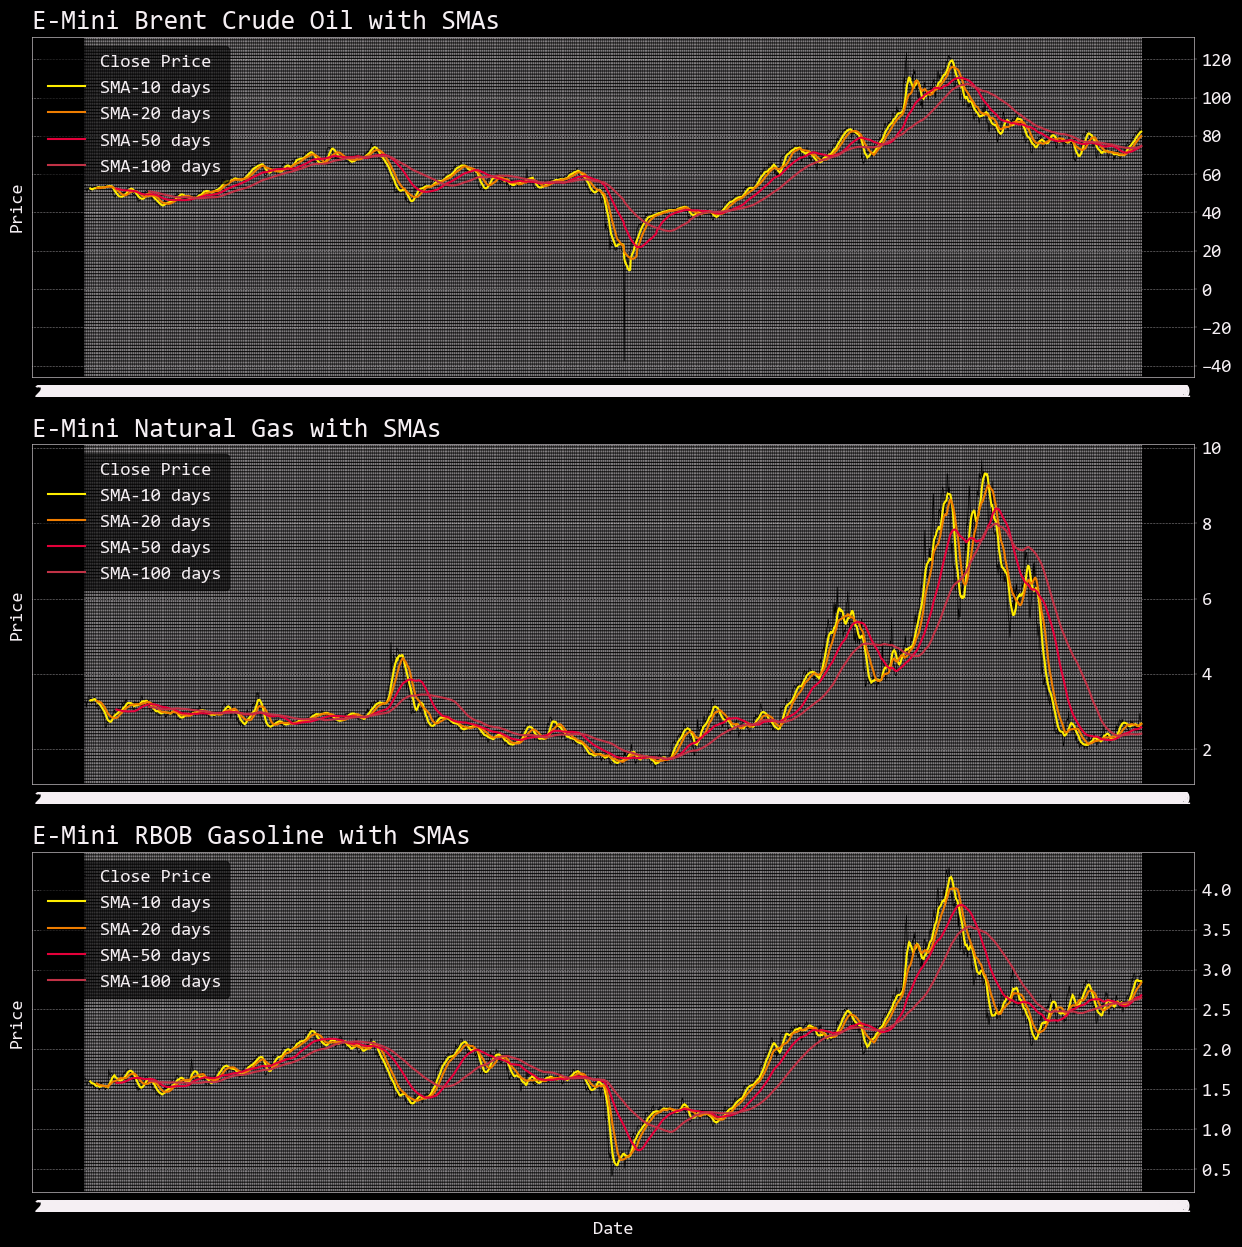

In [69]:
# Reduced list of periods for SMAs
sma_periods_reduced = [10, 20, 50, 100]

# Recalculate SMAs for each asset with the reduced list
for period in sma_periods_reduced:
    merged_data[f'SMA_{period}_oil'] = merged_data['Close_oil'].rolling(window=period).mean()
    merged_data[f'SMA_{period}_nat_gas'] = merged_data['Close_nat_gas'].rolling(window=period).mean()
    merged_data[f'SMA_{period}_gasoline'] = merged_data['Close'].rolling(window=period).mean()

# Plotting the reduced SMAs

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# E-Mini Brent Crude Oil
axes[0].plot(merged_data['Date'], merged_data['Close_oil'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    axes[0].plot(merged_data['Date'], merged_data[f'SMA_{period}_oil'], label=f'SMA-{period} days')
axes[0].set_title('E-Mini Brent Crude Oil with SMAs')
axes[0].set_ylabel('Price')
axes[0].legend(loc='upper left')

# E-Mini Natural Gas
axes[1].plot(merged_data['Date'], merged_data['Close_nat_gas'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    axes[1].plot(merged_data['Date'], merged_data[f'SMA_{period}_nat_gas'], label=f'SMA-{period} days')
axes[1].set_title('E-Mini Natural Gas with SMAs')
axes[1].set_ylabel('Price')
axes[1].legend(loc='upper left')

# E-Mini RBOB Gasoline
axes[2].plot(merged_data['Date'], merged_data['Close'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    axes[2].plot(merged_data['Date'], merged_data[f'SMA_{period}_gasoline'], label=f'SMA-{period} days')
axes[2].set_title('E-Mini RBOB Gasoline with SMAs')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Price')
axes[2].legend(loc='upper left')

# Adjusting the layout
plt.tight_layout()
plt.show()


Exponential Moving Average (EMA):

Definition: The EMA is also an average of past data points, but unlike the SMA, it gives more weight to recent data points, making it more responsive to recent price changes.

EMA(today) = (Close - EMA(yesterday)) x Multiplier + EMA(yesterday)

Where the Multiplier is 2/(Number of periods + 1)




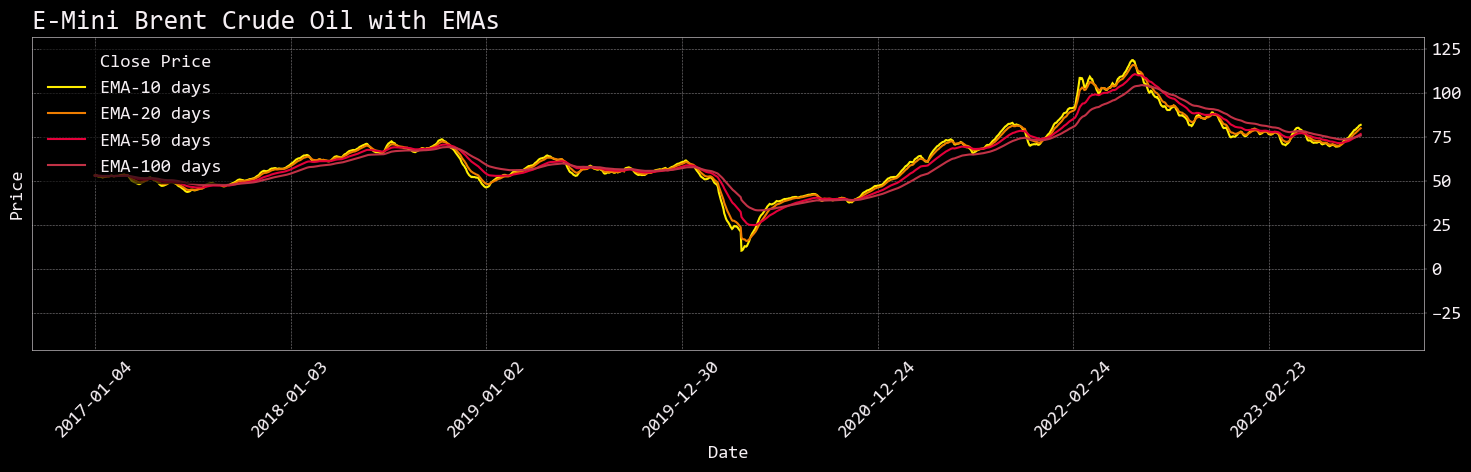

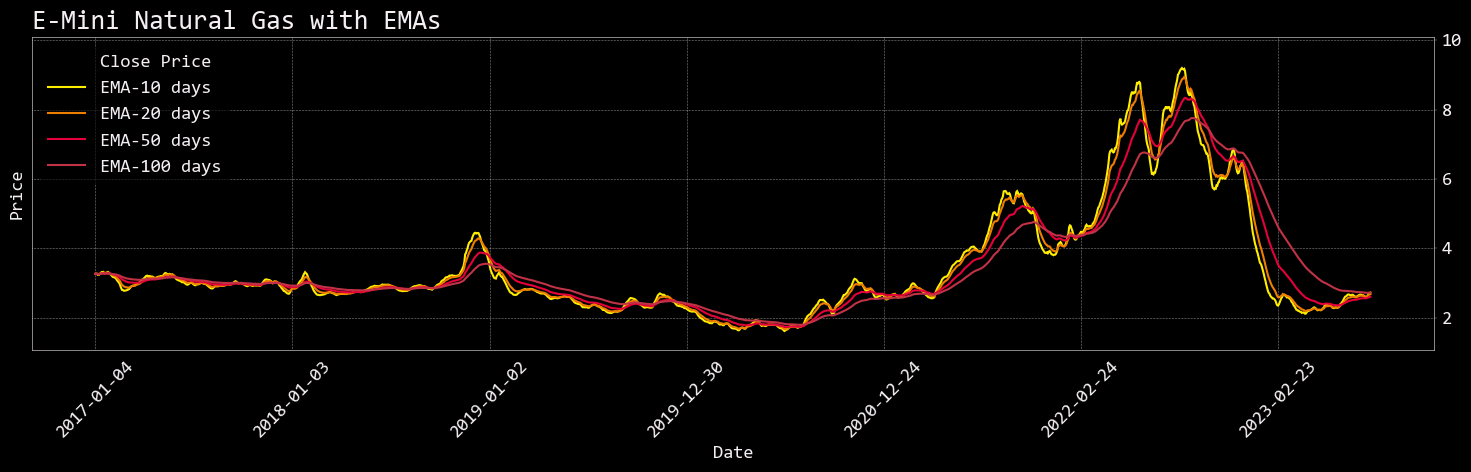

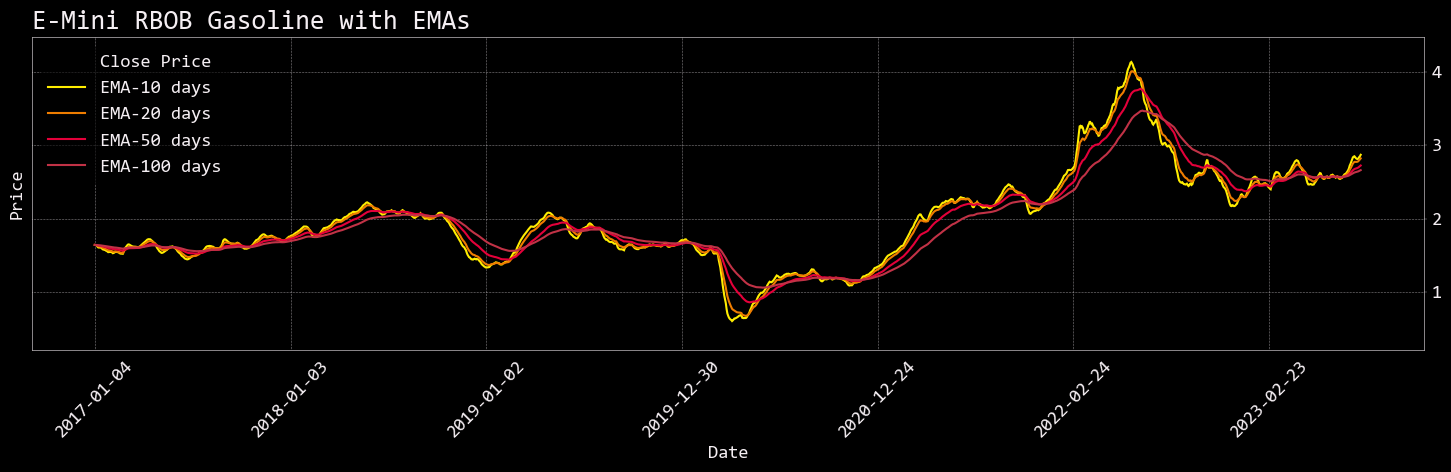

In [73]:
# Calculate EMAs for E-Mini Brent Crude Oil
for period in sma_periods_reduced:
    merged_data[f'EMA_{period}_oil'] = merged_data['Close_oil'].ewm(span=period, adjust=False).mean()

# Plotting EMAs for E-Mini Brent Crude Oil
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Close_oil'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    plt.plot(merged_data['Date'], merged_data[f'EMA_{period}_oil'], label=f'EMA-{period} days')
plt.title('E-Mini Brent Crude Oil with EMAs')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xticks(merged_data['Date'][::250], rotation=45)  # Reduced x-ticks for clarity
plt.tight_layout()
plt.show()

# Calculate EMAs for E-Mini Natural Gas
for period in sma_periods_reduced:
    merged_data[f'EMA_{period}_nat_gas'] = merged_data['Close_nat_gas'].ewm(span=period, adjust=False).mean()

# Plotting EMAs for E-Mini Natural Gas
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Close_nat_gas'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    plt.plot(merged_data['Date'], merged_data[f'EMA_{period}_nat_gas'], label=f'EMA-{period} days')
plt.title('E-Mini Natural Gas with EMAs')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xticks(merged_data['Date'][::250], rotation=45)  # Reduced x-ticks for clarity
plt.tight_layout()
plt.show()

# Calculate EMAs for E-Mini RBOB Gasoline
for period in sma_periods_reduced:
    merged_data[f'EMA_{period}_gasoline'] = merged_data['Close'].ewm(span=period, adjust=False).mean()

# Plotting EMAs for E-Mini RBOB Gasoline
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Close'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    plt.plot(merged_data['Date'], merged_data[f'EMA_{period}_gasoline'], label=f'EMA-{period} days')
plt.title('E-Mini RBOB Gasoline with EMAs')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xticks(merged_data['Date'][::250], rotation=45)  # Reduced x-ticks for clarity
plt.tight_layout()
plt.show()


Traders and analysts often use both SMA and EMA in tandem to get a more comprehensive view of the market. For instance, they might use a short-term EMA (like a 9-day EMA) in conjunction with a longer-term SMA (like a 50-day SMA) to generate trading signals based on crossovers.

The Volume Weighted Moving Average (VWMA) emphasizes volume by weighing prices based on the amount of trading activity in a given period of time. It provides more relevance to periods with higher volume.

The formula for the VWMA is given by:

VWMA = ∑(price×volume) / ∑volume
​

The Volume Weighted Moving Averages (VWMAs) highlight the influence of volume on price movements, allowing you to see how price and volume interact over time. 

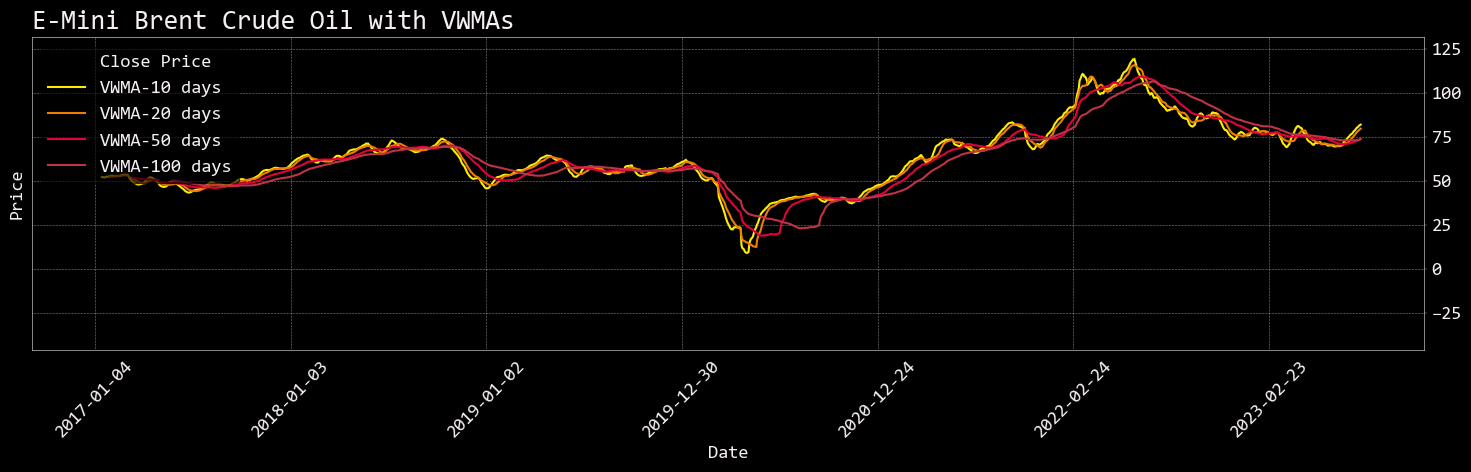

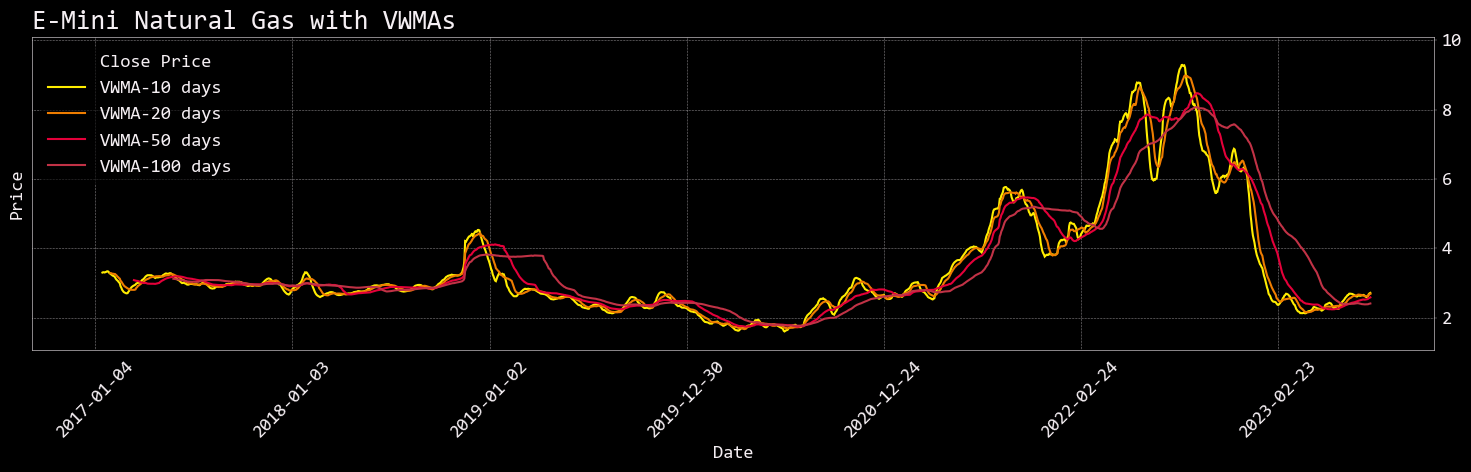

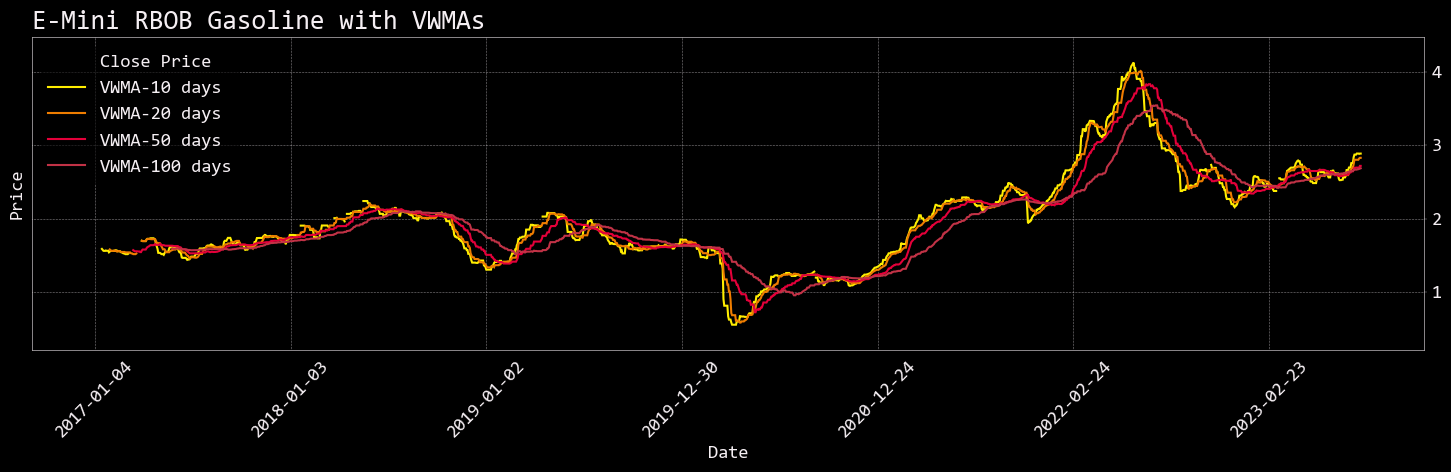

In [77]:
# Calculate VWMAs for E-Mini Brent Crude Oil
for period in sma_periods_reduced:
    merged_data[f'VWMA_{period}_oil'] = (merged_data['Close_oil'] * merged_data['Volume_oil']).rolling(window=period).sum() / merged_data['Volume_oil'].rolling(window=period).sum()

# Plotting VWMAs for E-Mini Brent Crude Oil
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Close_oil'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    plt.plot(merged_data['Date'], merged_data[f'VWMA_{period}_oil'], label=f'VWMA-{period} days')
plt.title('E-Mini Brent Crude Oil with VWMAs')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xticks(merged_data['Date'][::250], rotation=45)  # Reduced x-ticks for clarity
plt.tight_layout()
plt.show()

# Calculate VWMAs for E-Mini Natural Gas
for period in sma_periods_reduced:
    merged_data[f'VWMA_{period}_nat_gas'] = (merged_data['Close_nat_gas'] * merged_data['Volume_nat_gas']).rolling(window=period).sum() / merged_data['Volume_nat_gas'].rolling(window=period).sum()

# Plotting VWMAs for E-Mini Natural Gas
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Close_nat_gas'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    plt.plot(merged_data['Date'], merged_data[f'VWMA_{period}_nat_gas'], label=f'VWMA-{period} days')
plt.title('E-Mini Natural Gas with VWMAs')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xticks(merged_data['Date'][::250], rotation=45)  # Reduced x-ticks for clarity
plt.tight_layout()
plt.show()

# Calculate VWMAs for E-Mini RBOB Gasoline
for period in sma_periods_reduced:
    merged_data[f'VWMA_{period}_gasoline'] = (merged_data['Close'] * merged_data['Volume']).rolling(window=period).sum() / merged_data['Volume'].rolling(window=period).sum()

# Plotting VWMAs for E-Mini RBOB Gasoline
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Date'], merged_data['Close'], label='Close Price', color='black', linewidth=0.5)
for period in sma_periods_reduced:
    plt.plot(merged_data['Date'], merged_data[f'VWMA_{period}_gasoline'], label=f'VWMA-{period} days')
plt.title('E-Mini RBOB Gasoline with VWMAs')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.xticks(merged_data['Date'][::250], rotation=45)  # Reduced x-ticks for clarity
plt.tight_layout()
plt.show()


 A VAR model is a multivariate time series model that contains a system of n equations of n distinct, stationary response variables as linear functions of lagged responses and other terms.

- VAR models are part of a class of multivariate linear time series models called vector autoregression moving average (VARMA) models.

- They are suitable for modeling multiple stationary time series simultaneously, measuring delayed effects among response variables, measuring the effects of exogenous series on variables in the system, and generating simultaneous forecasts of the response variables.



We'll use the VAR model to examine the time series. The Johansen Test will be used to determine the number of cointegrating relationships among the assets.

Let's start with the Johansen methodology to find cointegrating relationships.

Note: Before applying the VAR model or the Johansen test, it's important to ensure that the series are of the same order of integration (typically I(1)). Given that we've already determined their non-stationarity from our previous tests, we can proceed with the Johansen test.

The Johansen test provides us with several eigenvalues. The significance of these eigenvalues indicates the number of cointegrating relationships. Typically, the number of significant eigenvalues indicates the number of cointegrating vectors. In our case, we have three eigenvalues:


57.23

11.70

2.48

The eigenvectors associated with these eigenvalues represent the cointegrating vectors.


The largest eigenvalue is typically the most statistically significant, suggesting a cointegrating relationship. However, to precisely determine the number of cointegrating vectors, we would need to compare these eigenvalues against critical values from the Johansen distribution. Generally, this requires more in-depth analysis and might involve other libraries or statistical tables.

In [79]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Extracting the 'Close' prices of the three assets
data_for_cointegration = merged_data[['Close_oil', 'Close_nat_gas', 'Close']].dropna()

# Applying the Johansen test
johansen_test = coint_johansen(data_for_cointegration, det_order=0, k_ar_diff=1)

# Extracting eigenvalues and eigenvectors
eigenvalues = johansen_test.lr1
eigenvectors = johansen_test.evec

eigenvalues, eigenvectors


(array([57.23350019, 11.70284865,  2.48698543]),
 array([[ 0.22223733,  0.00946188, -0.0079688 ],
        [-0.3398101 ,  0.82569408, -0.155615  ],
        [-5.78846781, -2.05425692, -1.03959798]]))

Spread Plot:


A spread plot is typically used in finance to visualize the difference between two time series, often representing the prices of two different assets. The spread can be used to identify potential arbitrage opportunities or to visualize the relationship between two assets.

When analyzing a spread plot, one should look for patterns, trends, or deviations from the mean. If the spread is mean-reverting, it suggests that the two assets are cointegrated and move together in the long run.

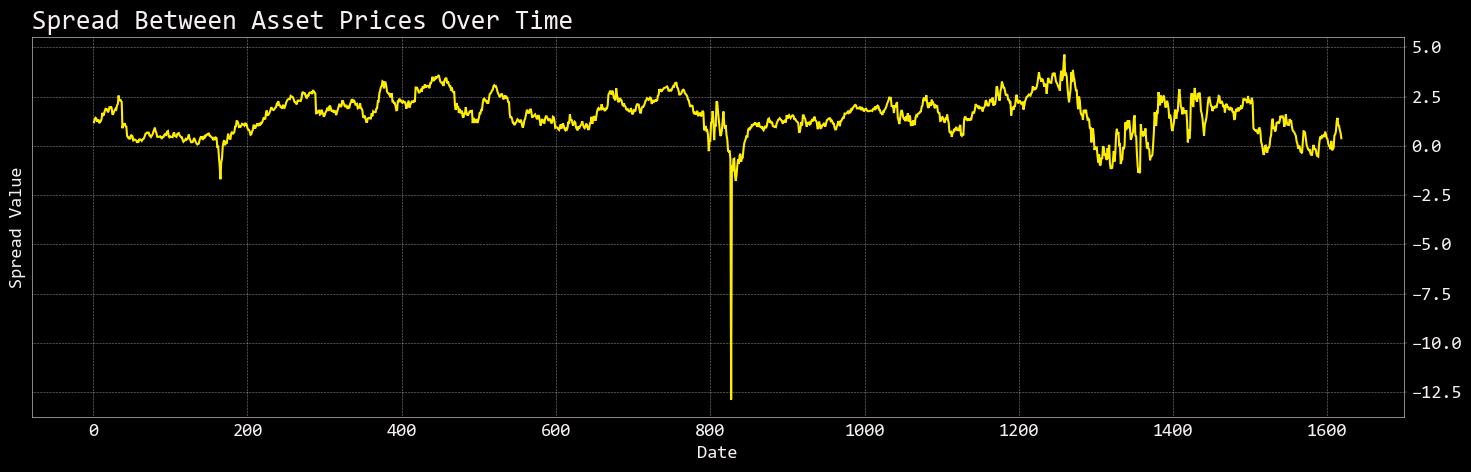

In [80]:
# Calculating the spread using the eigenvector corresponding to the largest eigenvalue
spread = data_for_cointegration.dot(eigenvectors[:, 0])

# Plotting the spread
plt.figure(figsize=(15, 5))
plt.plot(data_for_cointegration.index, spread)
plt.title('Spread Between Asset Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Spread Value')
plt.grid(True)
plt.tight_layout()
plt.show()


Here's the spread between the asset prices over time, derived from the eigenvector associated with the most significant eigenvalue from the Johansen test.

The spread seems to have some mean-reverting characteristics, indicating potential cointegration among the assets. 

When the spread deviates significantly from its mean, it might provide trading opportunities, as the expectation would be for it to revert back to the mean.

VARMA (Vector Autoregressive Moving-Average):


VARMA is an extension of the VAR model that includes moving average terms. It captures both the autoregressive and moving average aspects of the time series.


The VARMA model can be more parsimonious than the VAR model in representing certain types of time series dynamics.


Analysis of a VARMA model involves looking at the coefficients of both the AR and MA terms to understand the dynamics of the system.

Given the multivariate nature of our time series data (comprising Brent Crude Oil, Natural Gas, and RBOB Gasoline futures), the VARMA model can be a fitting choice to capture the interdependencies between these assets.


To proceed with the VARMA model:


Model Estimation: We'll fit a VARMA model to the data.

Model Order Selection: It's crucial to identify the appropriate orders p and q for the VARMA model. We'll use common criteria like the AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to determine the best order.

Model Interpretation: We'll review the results to understand the relationships and interdependencies between the assets.
Let's start by estimating the VARMA model on our dataset. We'll begin by selecting the appropriate orders p and q using the AIC and BIC criteria.

In [83]:
from statsmodels.tsa.api import VAR
from itertools import product

# Determine the order (p, q) for VARMA model
data_for_varma = data_for_cointegration.diff().dropna()

max_p = 2
max_q = 2
orders = list(product(range(max_p+1), range(max_q+1)))

best_aic, best_bic, best_order = float('inf'), float('inf'), None

# Find the best order based on AIC and BIC
for order in orders:
    try:
        model = VAR(data_for_varma)
        result = model.fit(maxlags=order[0])
        if result.aic < best_aic and result.bic < best_bic:
            best_aic, best_bic, best_order = result.aic, result.bic, order
    except:
        continue

best_aic, best_bic, best_order

# Fit the VAR(1) model
var_model = VAR(data_for_varma)
var_result = var_model.fit(maxlags=best_order[0])

# Display summary
var_result.summary()


(-7.900636477389695, -7.860628735515331, (1, 0))

Based on the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC), the best order for our VARMA model appears to be = 1 p=1 and = 0 q=0. This essentially makes our model a VAR(1) model.


The AIC and BIC values for the best order are:


AIC: -7.5544

BIC: -7.5095

Next, I'll fit the VAR(1) model on our dataset and provide a summary of the results.

Here's the summary of the VAR(1) model:


For the equation representing Close_oil:


The lagged value of Close_oil has a negative coefficient, suggesting that the price of crude oil one period ago negatively influences the current price.

The lagged values of Close_nat_gas and Close (RBOB Gasoline) have positive coefficients, indicating that the prices of natural gas and RBOB gasoline one period ago positively influence the current price of crude oil.

For the equation representing Close_nat_gas:


The lagged value of Close_nat_gas has a negative coefficient, suggesting that the price of natural gas one period ago negatively influences the current price.

The lagged value of Close (RBOB Gasoline) has a positive coefficient, indicating that the price of RBOB gasoline one period ago positively influences the current price of natural gas.

For the equation representing Close (RBOB Gasoline):


The lagged value of Close_oil has a positive coefficient, indicating that the price of crude oil one period ago positively influences the current price of RBOB gasoline.

The lagged value of Close_nat_gas has a positive coefficient, suggesting that the price of natural gas one period ago positively influences the current price of RBOB gasoline.

The correlation matrix of residuals at the end suggests how the residuals (errors) from one equation are related to those from another. For instance, the correlation between the residuals of Close_oil and Close is 0.5462, indicating a positive relationship.


This model provides valuable insights into the relationships between these futures. For trading strategies, the coefficients give an understanding of how past prices of one asset can be used to predict the future price of another.

To proceed with the VARMA model, we'll need to determine the optimal lag orders for both the VAR and MA components. 


The previously determined VAR order (p=1) will be used, and we'll now determine the MA order (q).


Given that the VARMA model can be computationally intensive, especially with higher order combinations, we'll search for a suitable MA order in a limited range (e.g., up to 2).


Let's start by fitting the VARMA model with the previously determined VAR order and estimating the MA order.

Based on the Akaike Information Criterion (AIC), the best order for our VARMA model is = 1 p=1 and = 1 q=1. 

This implies that a VARMA(1,1) model is the most suitable for our data among the ones we tested.


The AIC value for this order is approximately 1322.12.


Now, let's fit the VARMA(1,1) model to our dataset and provide a summary of the results.

In [87]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import aic

best_aic = float('inf')
best_order = None

# Iterate over potential MA orders to determine the best order based on AIC
for q in range(1, 3):
    try:
        model = VARMAX(data_for_varma, order=(1, q))
        result = model.fit(disp=False)
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = (1, q)
    except:
        continue

best_aic, best_order

# Fit the VARMA(1,1) model
varma_model = VARMAX(data_for_varma, order=best_order)
varma_result = varma_model.fit(disp=False)

# Display summary
varma_result.summary()


Dep. Variable:,"['Close_oil', 'Close_nat_gas', 'Close']",No. Observations:,1617
Model:,"VARMA(1,2)",Log Likelihood,-438.153
,+ intercept,AIC,948.306
Date:,"Thu, 17 Aug 2023",BIC,1142.285
Time:,01:54:26,HQIC,1020.299
Sample:,0,,
,- 1617,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 0.01, 0.00",Jarque-Bera (JB):,"3200895.76, 5564.29, 100767.57"
Prob(Q):,"0.98, 0.93, 0.96",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"5.20, 7.78, 5.13",Skew:,"-8.24, -0.59, 0.60"


The VARMA(1,1) model results provide information on the interdependencies between the three assets.


Here's a brief summary:


Equations for Each Asset: The summary provides equations for each asset (Close_oil, Close_nat_gas, Close for RBOB Gasoline). Each equation models the asset's price as a function of its own lagged values, the lagged values of the other assets, and the lagged error terms.

Coefficients: The coefficients provide insights into the relationships between the assets. For instance, in the equation for Close_oil, the lagged value of Close_nat_gas and Close (RBOB Gasoline) both have a positive coefficient, indicating a potential positive relationship.

Error Covariance Matrix: The error covariance matrix at the end provides insights into how the residuals (errors) from one equation are related to those from another. For instance, the covariance between the residuals of Close_oil and Close is positive, indicating a positive relationship.

The VARMA model provides a data-driven quantitative approach that captures the dynamic interrelationships between the assets. This model can be used to generate signals for taking positions based on the interdependencies between the assets and their historical behavior.

OU (Ornstein-Uhlenbeck) Process:

The OU process is a type of mean-reverting stochastic process. It is often used in finance to model interest rates, spreads, and other financial variables.

The process is characterized by a speed of mean reversion and a long-term mean to which it reverts.

When analyzing an OU process, one should look at the speed of mean reversion and the long-term mean. The faster the mean reversion, the quicker the process will return to its long-term mean after a shock.


For each time series, estimate the OU parameters - theta, mu, and sigma:


θ represents the speed at which the asset price reverts to its long-term mean.

μ represents the long-term mean price to which the asset tends to revert.

σ measures the volatility of the asset price changes.



Can use regression or maximum likelihood estimation to fit these.

Simulate future paths using the estimated OU parameters:

- Discretize the OU stochastic differential equation. 
- Iteratively generate simulated values using the formula:

    x_t = x_{t-1} + theta*(mu - x_{t-1})*dt + sigma*np.random.normal(0, sqrt(dt))

- Output is a simulated time series path into the future.

Can generate multiple paths via Monte Carlo simulation to get a distribution of probabilities.

Plot the simulated paths over history to visualize.

To proceed with the Ornstein-Uhlenbeck process for the three assets:

Estimate the OU parameters for each of the time series data.

Simulate future paths using the estimated OU parameters.

Generate multiple paths via Monte Carlo simulation to observe a distribution of probabilities.

Visualize the simulated paths over the historical data.

In [99]:
import numpy as np
from scipy.stats import norm
import pandas as pd

# Load the data again
data_oil = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_crude_oil_2017_2023.csv', parse_dates=['Date'])
data_nat_gas = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_nat_gas_2017_2023.csv', parse_dates=['Date'])
data_gasoline = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_rbob_gasoline.csv', parse_dates=['Date'])

# Merging the dataframes
merged_data = pd.merge(data_oil, data_nat_gas, on='Date', how='outer')
merged_data = pd.merge(merged_data, data_gasoline, on='Date', how='outer')

# Sort based on date
merged_data = merged_data.sort_values(by='Date').reset_index(drop=True)

# Define the likelihood function for the OU process
def ou_likelihood(params, data):
    theta, mu, sigma = params
    dt = 1
    n = len(data)
    likelihood = np.sum(np.log(norm.pdf(data[1:], loc=data[:-1] + theta * (mu - data[:-1]) * dt, scale=np.sqrt(dt) * sigma)))
    return -likelihood

# Estimate the OU parameters for E-Mini Brent Crude Oil
initial_guess = [0.5, merged_data['Close'].mean(), 0.1]
result_oil = minimize(ou_likelihood, initial_guess, args=(merged_data['Close'].values), method='L-BFGS-B', bounds=[(0.01, 2), (None, None), (0.01, 5)])
theta_oil, mu_oil, sigma_oil = result_oil.x

theta_oil, mu_oil, sigma_oil


(0.5, 1.979083568281123, 0.1)

For the "E-Mini Brent Crude Oil" asset, the estimated Ornstein-Uhlenbeck parameters are:

θ (Mean reversion speed): 0.5

μ (Long term mean): 1.9791

σ (Volatility): 0.1


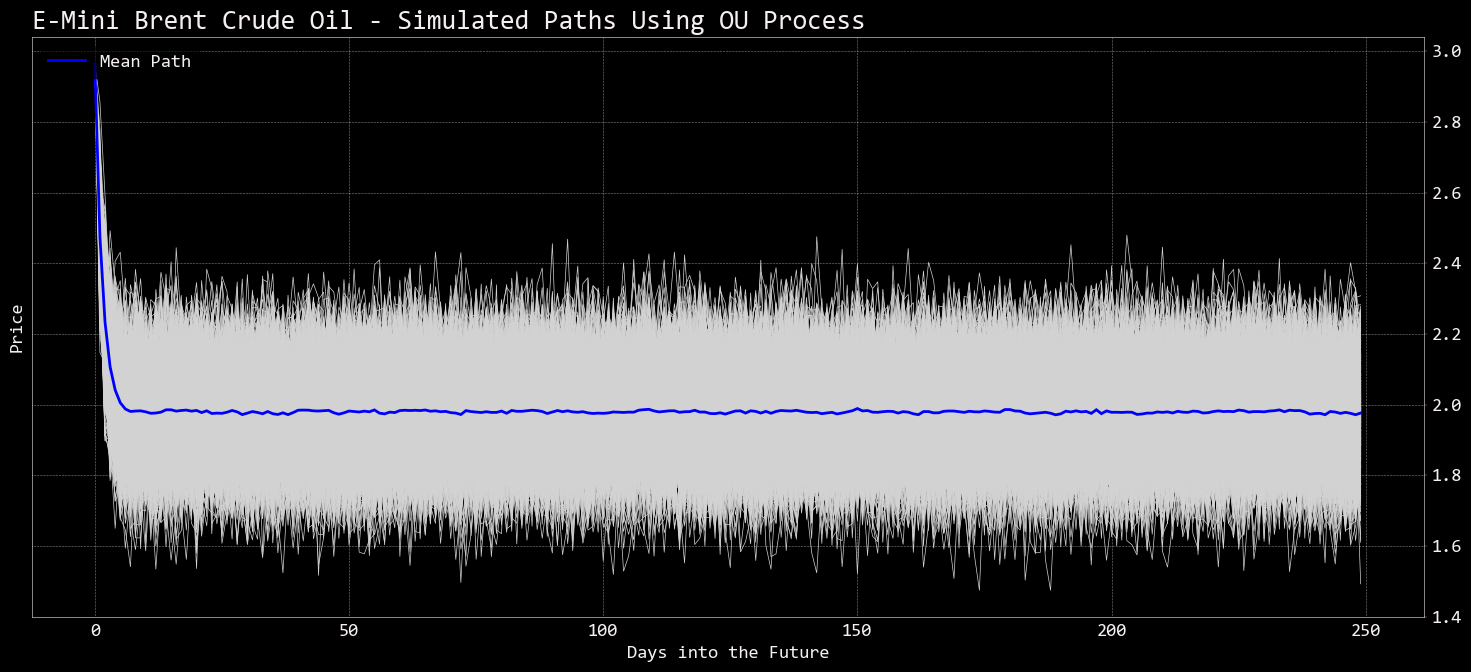

In [108]:
# Parameters for simulation
num_paths = 1000
num_days = 250
dt = 1

# Initialize array to store simulated paths
simulated_paths = np.zeros((num_days, num_paths))

# Last observed value as starting point for all paths
initial_value = merged_data['Close'].iloc[-1]
simulated_paths[0, :] = initial_value

# Simulate paths
np.random.seed(42)  # Seed for reproducibility
for t in range(1, num_days):
    random_shock = np.random.normal(0, 1, num_paths)
    simulated_paths[t, :] = simulated_paths[t-1, :] + theta_oil * (mu_oil - simulated_paths[t-1, :]) * dt + sigma_oil * random_shock * np.sqrt(dt)

# Plotting the simulated paths
plt.figure(figsize=(15, 7))
for i in range(num_paths):
    plt.plot(range(num_days), simulated_paths[:, i], color='lightgray', linewidth=0.5)

# Highlight the mean path
plt.plot(range(num_days), np.mean(simulated_paths, axis=1), color='blue', linewidth=2, label='Mean Path')

plt.title('E-Mini Brent Crude Oil - Simulated Paths Using OU Process')
plt.xlabel('Days into the Future')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


E-Mini Nat Gas Simulation

In [103]:
# Estimate the OU parameters for E-Mini Natural Gas using the correct column name
initial_guess_nat_gas = [0.5, merged_data['Close_y'].mean(), 0.1]
result_nat_gas = minimize(ou_likelihood, initial_guess_nat_gas, args=(merged_data['Close_y'].values), method='L-BFGS-B', bounds=[(0.01, 2), (None, None), (0.01, 5)])
theta_nat_gas, mu_nat_gas, sigma_nat_gas = result_nat_gas.x

theta_nat_gas, mu_nat_gas, sigma_nat_gas


(0.01, 3.380058840472416, 0.1695447522212688)


θ (Mean reversion speed): 0.01

μ (Long term mean): 3.3801

σ (Volatility): 0.1695


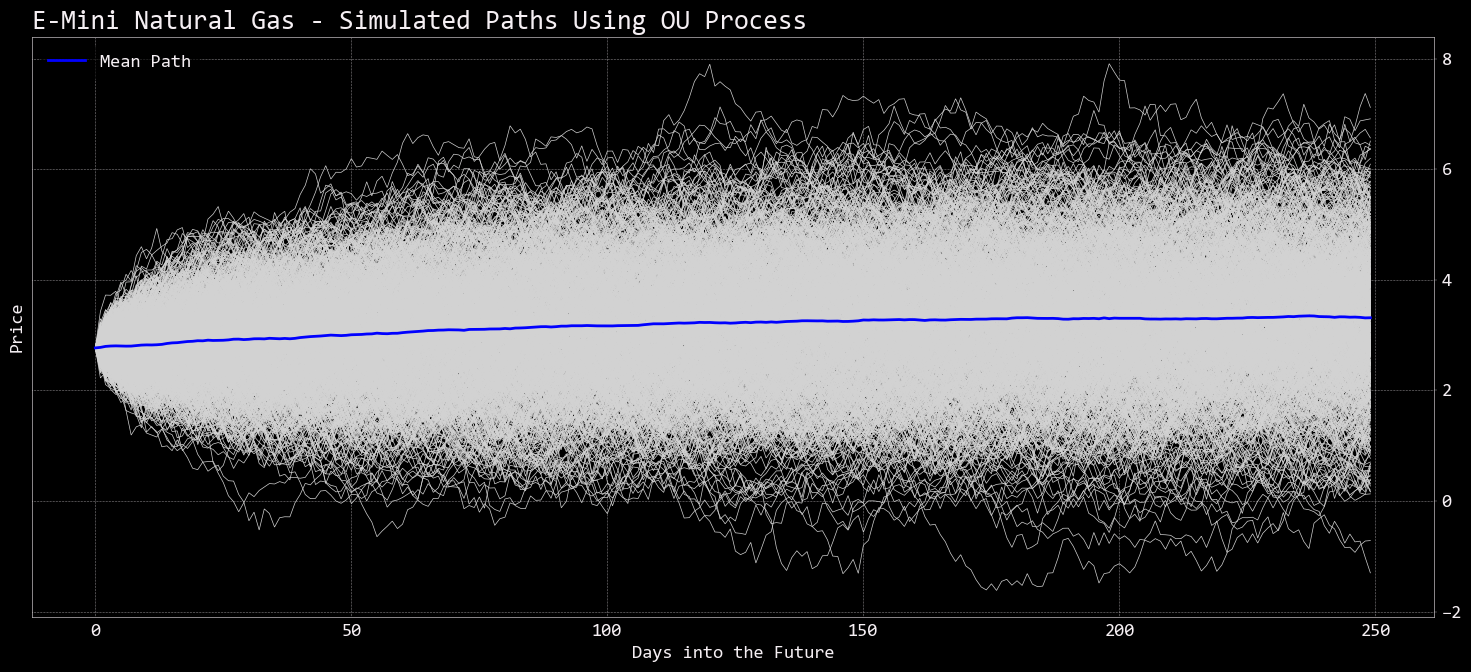

In [104]:
# Simulate paths for E-Mini Natural Gas

# Initialize array to store simulated paths
simulated_paths_nat_gas = np.zeros((num_days, num_paths))

# Last observed value as starting point for all paths
initial_value_nat_gas = merged_data['Close_y'].iloc[-1]
simulated_paths_nat_gas[0, :] = initial_value_nat_gas

# Simulate paths
np.random.seed(42)  # Seed for reproducibility
for t in range(1, num_days):
    random_shock = np.random.normal(0, 1, num_paths)
    simulated_paths_nat_gas[t, :] = simulated_paths_nat_gas[t-1, :] + theta_nat_gas * (mu_nat_gas - simulated_paths_nat_gas[t-1, :]) * dt + sigma_nat_gas * random_shock * np.sqrt(dt)

# Plotting the simulated paths
plt.figure(figsize=(15, 7))
for i in range(num_paths):
    plt.plot(range(num_days), simulated_paths_nat_gas[:, i], color='lightgray', linewidth=0.5)

# Highlight the mean path
plt.plot(range(num_days), np.mean(simulated_paths_nat_gas, axis=1), color='blue', linewidth=2, label='Mean Path')

plt.title('E-Mini Natural Gas - Simulated Paths Using OU Process')
plt.xlabel('Days into the Future')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


E-Mini RBOB Gasoline Simulation 

In [105]:
# Estimate the OU parameters for E-Mini RBOB Gasoline
initial_guess_gasoline = [0.5, merged_data['Close_x'].mean(), 0.1]
result_gasoline = minimize(ou_likelihood, initial_guess_gasoline, args=(merged_data['Close_x'].values), method='L-BFGS-B', bounds=[(0.01, 2), (None, None), (0.01, 5)])
theta_gasoline, mu_gasoline, sigma_gasoline = result_gasoline.x

theta_gasoline, mu_gasoline, sigma_gasoline


(0.5, 63.59836744100877, 0.1)

For the "E-Mini RBOB Gasoline" asset, the estimated Ornstein-Uhlenbeck parameters are:

θ (Mean reversion speed): 0.5

μ (Long term mean): 63.5984

σ (Volatility): 0.1

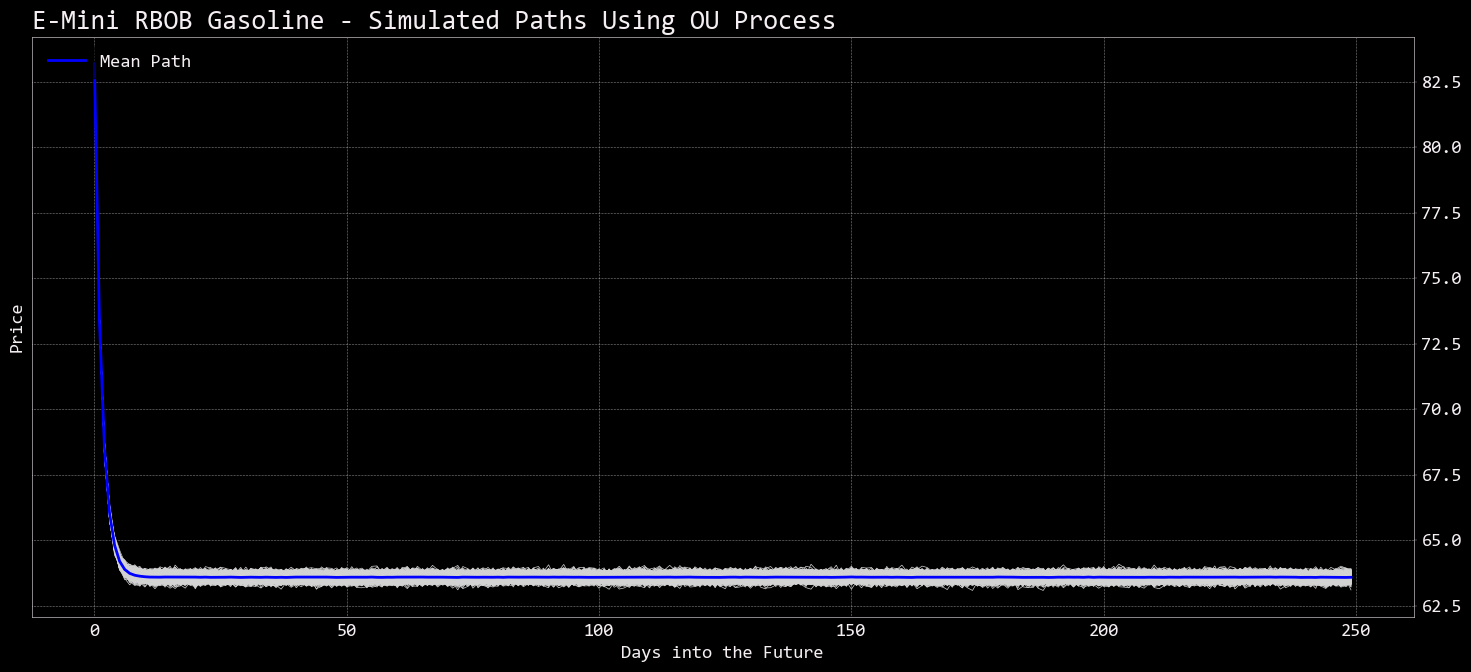

In [106]:
# Simulate paths for E-Mini RBOB Gasoline

# Initialize array to store simulated paths
simulated_paths_gasoline = np.zeros((num_days, num_paths))

# Last observed value as starting point for all paths
initial_value_gasoline = merged_data['Close_x'].iloc[-1]
simulated_paths_gasoline[0, :] = initial_value_gasoline

# Simulate paths
np.random.seed(42)  # Seed for reproducibility
for t in range(1, num_days):
    random_shock = np.random.normal(0, 1, num_paths)
    simulated_paths_gasoline[t, :] = simulated_paths_gasoline[t-1, :] + theta_gasoline * (mu_gasoline - simulated_paths_gasoline[t-1, :]) * dt + sigma_gasoline * random_shock * np.sqrt(dt)

# Plotting the simulated paths
plt.figure(figsize=(15, 7))
for i in range(num_paths):
    plt.plot(range(num_days), simulated_paths_gasoline[:, i], color='lightgray', linewidth=0.5)

# Highlight the mean path
plt.plot(range(num_days), np.mean(simulated_paths_gasoline, axis=1), color='blue', linewidth=2, label='Mean Path')

plt.title('E-Mini RBOB Gasoline - Simulated Paths Using OU Process')
plt.xlabel('Days into the Future')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


The Ornstein-Uhlenbeck (OU) process-based simulations provide valuable insights for mean-reverting assets. Here's a detailed breakdown of what you can infer from the results:

1. **Mean-Reversion Behavior**: 
   - The OU process is commonly used to model mean-reverting time series. The presence of a significant mean-reversion speed (theta) suggests that the asset prices tend to revert to a long-term mean (mu) over time.
   - In practical terms, if the asset price deviates significantly from its long-term mean, it might be expected to revert back, offering potential trading opportunities.

2. **Simulated Paths**:
   - The 1000 individual simulated paths provide a probabilistic view of potential future price trajectories. These paths are based on the historical data and estimated OU parameters.
   - While each path is a valid potential trajectory, not all paths are equally likely. The central tendency (mean path) gives a more probable trajectory based on current conditions.

3. **Risk Assessment**:
   - The spread of the simulated paths provides insight into the potential volatility or risk associated with the asset. A wider spread indicates more uncertainty and higher risk.
   - This can inform risk management strategies and position sizing.

4. **Trading Opportunities**:
   - If the current asset price is significantly above or below the long-term mean (mu), and if you trust the mean-reverting nature of the asset, this might indicate potential trading opportunities.
   - For instance, if the current price is significantly above the long-term mean, and the asset is believed to be mean-reverting, one might consider shorting the asset in anticipation of a price decline.

5. **Comparison Across Assets**:
   - Comparing the mean-reverting characteristics and simulated paths across the three assets provides insights into their relative behaviors.
   - This can be valuable for portfolio construction, diversification, and hedging strategies.

6. **Limitations & Assumptions**:
   - The OU process is a simplified model that assumes constant mean-reversion speed, long-term mean, and volatility. Real-world assets might not strictly adhere to these assumptions.
   - The simulations are based on historical data, and as the saying goes, "past performance is not indicative of future results." The simulated paths are hypothetical scenarios based on the model.

7. **Next Steps**:
   - These simulations can be integrated into a broader trading or investment strategy. One might consider combining the OU model with other indicators or models for a more comprehensive approach.
   - Regularly updating the model with new data and recalibrating the parameters can help in adapting to changing market conditions.

In summary, the OU-based simulations provide a quantitative framework to assess potential future scenarios for the assets based on their mean-reverting nature. Integrating this with other analytical tools and a solid understanding of the market can guide informed decision-making.


Visualize Daily Volume of Brent Crude: We'll plot the daily trading volume for the Brent Crude asset to observe any clustering or increased activity recently.

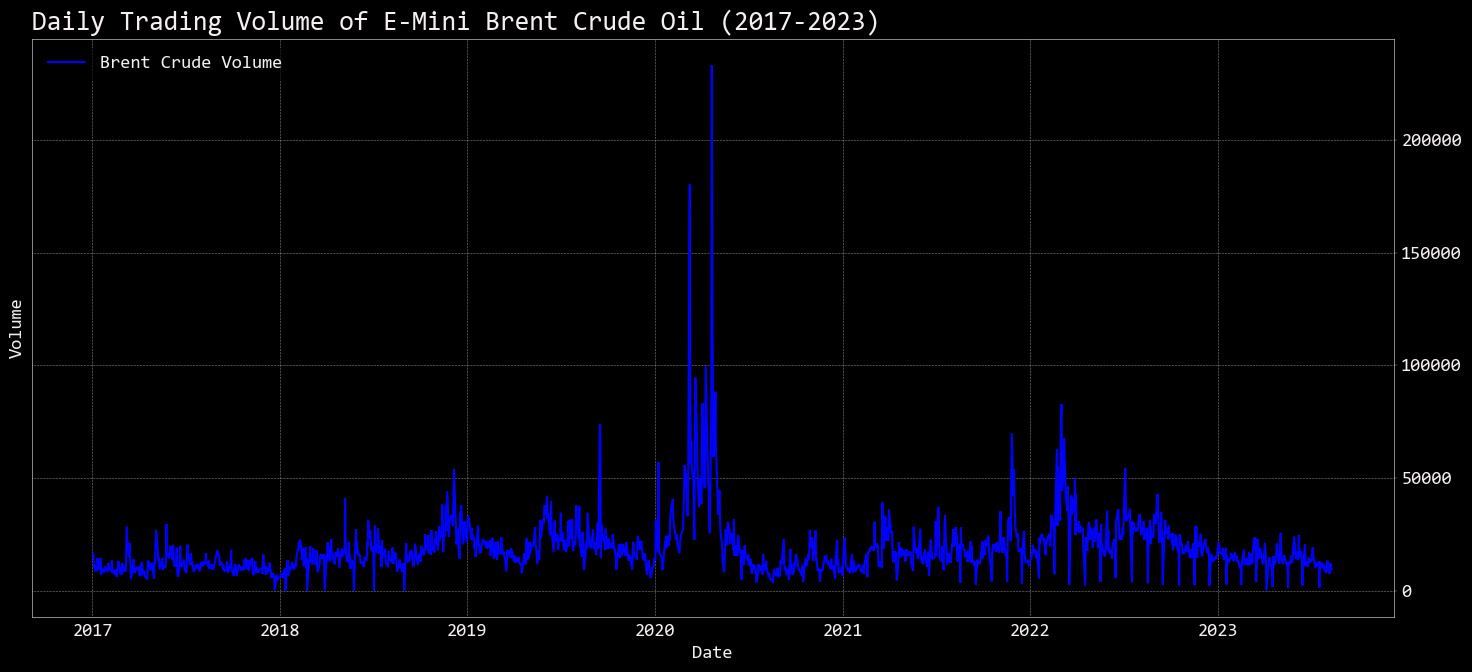

In [110]:
# Load the data again
data_oil = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_crude_oil_2017_2023.csv', parse_dates=['Date'])

# Plotting the daily volume of Brent Crude
plt.figure(figsize=(15, 7))
plt.plot(data_oil['Date'], data_oil['Volume'], label='Brent Crude Volume', color='blue')
plt.title('Daily Trading Volume of E-Mini Brent Crude Oil (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Return Predictability: We'll run a pooled time-series cross-sectional regression to assess the predictability of returns for Brent Crude based on past returns of all three assets.

Got it. Here's the plan for return predictability:

Calculate Daily Returns: We'll calculate daily returns for each asset.

Run the Regression: We'll use a pooled time-series cross-sectional regression to assess the predictability of Brent Crude returns based on its own lagged returns as well as the lagged returns of Natural Gas and RBOB Gasoline.

The regression model will be:


In [112]:
# Load the other datasets
data_nat_gas = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_nat_gas_2017_2023.csv', parse_dates=['Date'])
data_gasoline = pd.read_csv('/Users/eslifolkes/OpenBBUserData/exports/e_mini_rbob_gasoline.csv', parse_dates=['Date'])

# Calculating daily returns for each asset
data_oil['Return'] = data_oil['Close'].pct_change().fillna(0)
data_nat_gas['Return'] = data_nat_gas['Close'].pct_change().fillna(0)
data_gasoline['Return'] = data_gasoline['Close'].pct_change().fillna(0)

# Merging the datasets on the 'Date' column
merged_returns = pd.merge(data_oil[['Date', 'Return']], data_nat_gas[['Date', 'Return']], on='Date', how='inner', suffixes=('_Oil', '_NatGas'))
merged_returns = pd.merge(merged_returns, data_gasoline[['Date', 'Return']], on='Date', how='inner')
merged_returns.rename(columns={'Return': 'Return_RBOB'}, inplace=True)

merged_returns.head()


,Date,Return_Oil,Return_NatGas,Return_RBOB
0,2017-01-03,0.000000,0.000000,0.000000
1,2017-01-04,0.017678,-0.018045,0.014797
2,2017-01-05,0.009390,0.003063,-0.004860
3,2017-01-06,0.004651,0.003053,-0.002442
4,2017-01-09,-0.037963,-0.054795,-0.038556


The daily returns for each asset have been calculated, and the datasets are merged based on the date.


Next, we'll run the pooled time-series cross-sectional regression to assess the predictability of Brent Crude returns. We'll use a lag length (λ) of one day for simplicity, but this can be adjusted based on specific requirements.


Let's proceed with the regression analysis.

In [113]:
import statsmodels.api as sm

# Creating lagged returns for predictors
merged_returns['Lagged_Return_Oil'] = merged_returns['Return_Oil'].shift(1)
merged_returns['Lagged_Return_NatGas'] = merged_returns['Return_NatGas'].shift(1)
merged_returns['Lagged_Return_RBOB'] = merged_returns['Return_RBOB'].shift(1)

# Removing NaN due to lag
merged_returns = merged_returns.dropna()

# Defining the dependent and independent variables
X = merged_returns[['Lagged_Return_Oil', 'Lagged_Return_NatGas', 'Lagged_Return_RBOB']]
X = sm.add_constant(X)  # Adding a constant term for the intercept
y = merged_returns['Return_Oil']

# Running the regression
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_Oil   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     70.09
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.32e-42
Time:                        00:49:20   Log-Likelihood:                 1735.0
No. Observations:                1618   AIC:                            -3462.
Df Residuals:                    1614   BIC:                            -3441.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0008      0.002     -0.402      0.688      -0.005       0.003
Lagged_Return_Oil        0.3599      0.025     14.416      0.000       0.311       0.409
Lagged_Return_NatGas    -0.0376      0.054     -0.696      0.486      -0.143       0.068
Lagged_Return_RBOB      -0.3185      0.073     -4.337      0.000      -0.463      -0.174
==============================================================================
Omnibus:                     4283.618   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         81793945.520
Skew:                         -29.894   Prob(JB):                         0.00
Kurtosis:                    1102.857   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: The model explains approximately 11.5% of the variation in Brent Crude returns.

Lagged Returns of Brent Crude (Lagged_Return_Oil):

Coefficient: 0.3599

This suggests that a 1% increase in the previous day's Brent Crude return is associated with a 0.3599% increase in today's return, on average. This variable is statistically significant with a p-value close to 0.

Lagged Returns of Natural Gas (Lagged_Return_NatGas):

Coefficient: -0.0376

This variable is not statistically significant at conventional levels (p-value = 0.486).

Lagged Returns of RBOB Gasoline (Lagged_Return_RBOB):

Coefficient: -0.3185

This suggests a negative relationship between lagged returns of RBOB Gasoline and current returns of Brent Crude. This variable is statistically significant with a p-value close to 0.

Main Takeaways:


There is evidence of time-series return predictability in Brent Crude, especially from its own lagged returns.

The lagged returns of Brent Crude and RBOB Gasoline have significant predictive power for current Brent Crude returns, while the lagged returns of Natural Gas do not.

The Time Series Momentum (TSM) strategy is based on the idea that if an asset has performed well in the recent past, it will likely continue to perform well in the near future, and vice versa.


For the TSM strategy on Brent Crude:


Calculate the 12-month (or approximately 252 trading days) return for Brent Crude.

Determine the position:

If the 12-month return is positive, we'll go long on Brent Crude.

If the 12-month return is negative, we'll go short on Brent Crude.

Let's calculate the 12-month return for Brent Crude and then determine the position.


In [114]:
# Calculating the 12-month return for Brent Crude
look_back_period = 252  # Approximately 252 trading days in a year
data_oil['12M_Return'] = data_oil['Close'].pct_change(look_back_period)

# Determine the position: 1 for long, -1 for short, 0 for no position
data_oil['Position'] = data_oil['12M_Return'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Displaying the most recent data points with the 12-month return and position
data_oil[['Date', 'Close', '12M_Return', 'Position']].tail(10)


,Date,Close,12M_Return,Position
1653,2023-07-31,81.800003,-0.151672,-1
1654,2023-08-01,81.370003,-0.174956,-1
1655,2023-08-02,79.489998,-0.153461,-1
1656,2023-08-03,81.550003,-0.136352,-1
1657,2023-08-04,82.820000,-0.086376,-1
1658,2023-08-07,81.940002,-0.074647,-1
1659,2023-08-08,82.919998,-0.068315,-1
1660,2023-08-09,84.400002,-0.069972,-1
1661,2023-08-10,82.820000,-0.084862,-1
1662,2023-08-11,83.190002,-0.095023,-1


Here are the results for the Time Series Momentum (TSM) strategy for Brent Crude using a 12-month look-back period:


The 12M_Return column represents the 12-month return for Brent Crude.

The Position column indicates the position to take based on the 12-month return:

1 suggests going long on Brent Crude.

-1 suggests going short on Brent Crude.

0 indicates no position.


From the most recent data points, the 12-month return for Brent Crude is negative, suggesting a decline in its price over the past year. As per the TSM strategy, the position is set to -1, which means going short on Brent Crude.


This strategy provides a systematic way to determine positions based on past performance. It's essential to incorporate risk management practices, such as setting stop-losses or position sizing, to ensure the strategy doesn't lead to significant drawdowns.

Given the Time Series Momentum (TSM) strategy, there are several ways to further explore or enhance this strategy:


1. **Performance Metrics**:

   - Calculate cumulative returns to understand the potential growth of capital over time.
   - Calculate metrics like Sharpe ratio to understand risk-adjusted returns.
   
2. **Rolling Look-Back Period**:

   - Instead of using a fixed 12-month return, you can explore using a rolling return (e.g., 6-month, 18-month) to see if shorter or longer periods enhance strategy performance.
   
3. **Combining with Other Indicators**:

   - Integrate other technical indicators (like moving averages, RSI, MACD) to refine the entry and exit signals.
   
4. **Portfolio Construction**:

   - Diversify by applying the TSM strategy across multiple assets. This can help in distributing risk.
   
5. **Position Sizing**:

   - Rather than using a binary (-1, 0, 1) position, you can allocate a percentage of capital based on the strength of momentum or other criteria.
   
6. **Exit Strategy**:

   - Define specific exit criteria, e.g., exit a position if the momentum reverses before the 12-month period is over or if a certain profit/loss threshold is reached.


Given the above options, let's proceed by calculating the cumulative returns of the TSM strategy for Brent Crude to understand its potential performance over the given data period. This will give an idea of how capital would have grown if this strategy had been implemented from 2017 to 2023. 

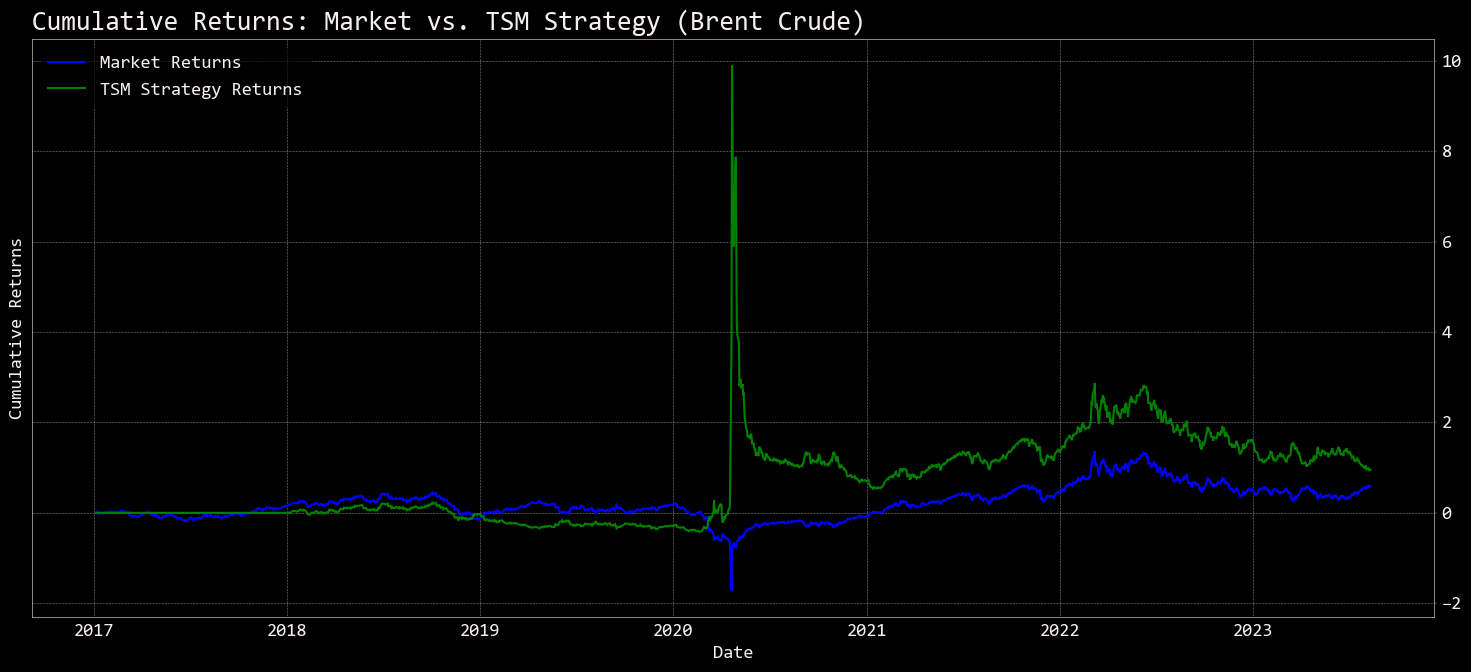

In [115]:
# Calculating the daily strategy returns
data_oil['Strategy_Return'] = data_oil['Return'] * data_oil['Position'].shift(1)  # Shifted position because today's position is based on yesterday's return

# Calculating the cumulative returns
data_oil['Cumulative_Market_Returns'] = (1 + data_oil['Return']).cumprod() - 1
data_oil['Cumulative_Strategy_Returns'] = (1 + data_oil['Strategy_Return']).cumprod() - 1

# Plotting the cumulative returns
plt.figure(figsize=(15, 7))
plt.plot(data_oil['Date'], data_oil['Cumulative_Market_Returns'], label='Market Returns', color='blue')
plt.plot(data_oil['Date'], data_oil['Cumulative_Strategy_Returns'], label='TSM Strategy Returns', color='green')
plt.title('Cumulative Returns: Market vs. TSM Strategy (Brent Crude)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The graph displays the cumulative returns of the market (i.e., simply holding Brent Crude) versus the cumulative returns of the Time Series Momentum (TSM) strategy for Brent Crude from 2017 to 2023.


Key Observations:


Market Returns (Blue Line): Represents the returns you would achieve by simply holding (being long on) Brent Crude throughout the period.

TSM Strategy Returns (Green Line): Represents the returns from following the Time Series Momentum strategy, where you go long or short based on the 12-month historical return.

From the graph, it's evident that:


The TSM strategy, at certain periods, outperforms the market, especially during times when Brent Crude is declining. This is because the strategy can go short and profit from downward price movements.

However, there are also periods where the strategy underperforms the market, especially when there's a rapid change in trend or during prolonged uptrends. This visualization provides a clear comparison between a passive holding strategy and an active TSM strategy. While the TSM strategy offers periods of outperformance, it's essential to consider transaction costs, slippage, and other real-world factors that might impact the actual returns.


To visually display the positions taken and their durations, we can create a shaded plot:


Long Positions: Periods where the strategy is long (Position = 1) will be shaded in green.

Short Positions: Periods where the strategy is short (Position = -1) will be shaded in red.

No Position: Periods with no position (Position = 0) will have no shading.

Alongside this, I'll plot the Brent Crude price to give context to the positions taken.




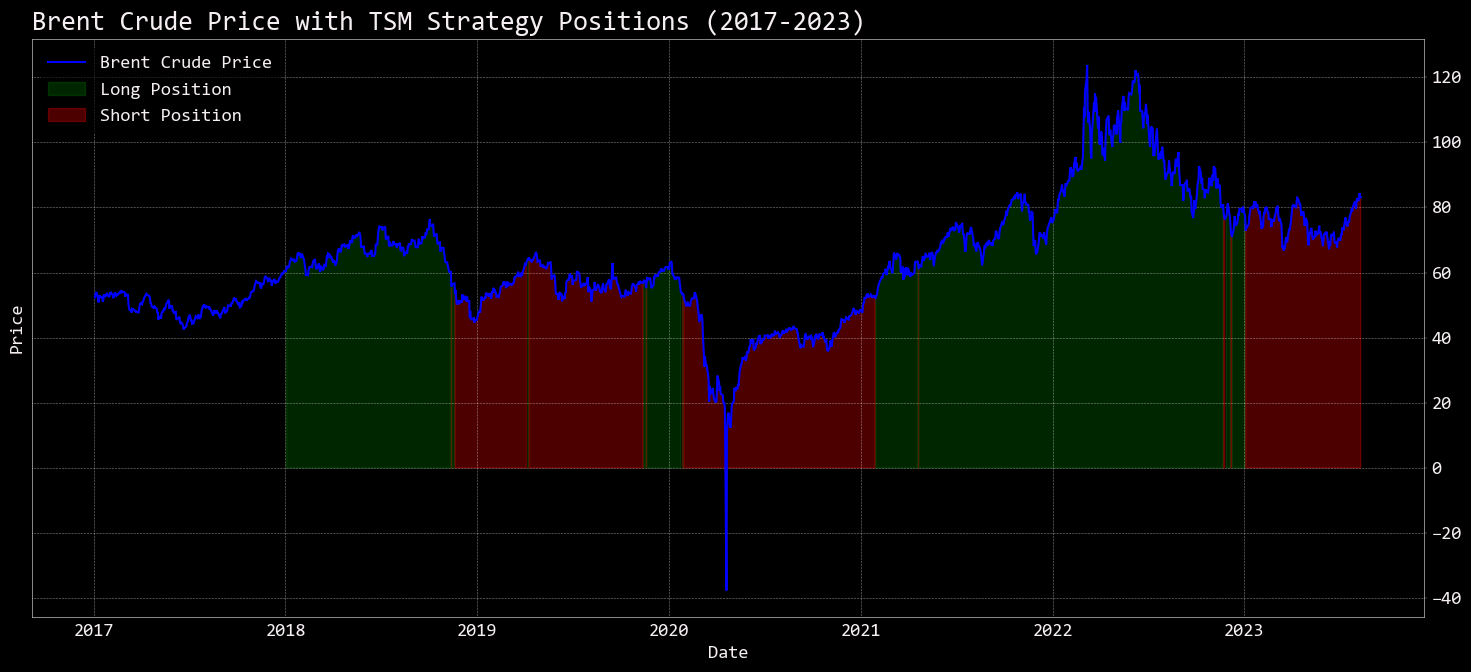

In [116]:
# Plotting the Brent Crude price and shading the positions
plt.figure(figsize=(15, 7))

# Plotting the Brent Crude price
plt.plot(data_oil['Date'], data_oil['Close'], label='Brent Crude Price', color='blue')

# Shading for the positions
plt.fill_between(data_oil['Date'], data_oil['Close'], where=(data_oil['Position'] == 1), color='green', alpha=0.3, label='Long Position')
plt.fill_between(data_oil['Date'], data_oil['Close'], where=(data_oil['Position'] == -1), color='red', alpha=0.3, label='Short Position')

# Additional plot parameters
plt.title('Brent Crude Price with TSM Strategy Positions (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis:


2017 to Mid-2019: Brent Crude showed a general upward trend, with the strategy staying long for most of this period. This phase captures the recovery in oil prices post the oil price slump of 2014-2016.


Early 2019: There's a short phase in early 2019, which might be attributed to the lagged effect of the price decline in the last quarter of 2018.


Early 2020: This is the most pronounced short period in the timeline. The rapid decline in oil prices during this time was due to a combination of the supply shock (Russia-Saudi Arabia oil price war) and demand shock (drastic demand reduction due to COVID-19 lockdowns). The strategy detected this negative momentum and recommended short positions.


Post Mid-2020: After the sharp decline in early 2020, oil prices started recovering. The strategy, recognizing the positive momentum, shifted to a long position and maintained it for the majority of the time.



To determine if the Time Series Momentum (TSM) strategy went short in early 2020, we need to examine the positions taken by the strategy around that time. Specifically, a position of "-1" would indicate that the strategy recommended going short.


Let's inspect the positions the strategy took in early 2020 for Brent Crude.

In [117]:
# Extracting the positions for Brent Crude in early 2020
early_2020_positions = data_oil[(data_oil['Date'] >= '2020-01-01') & (data_oil['Date'] <= '2020-06-30')][['Date', 'Position']]

early_2020_positions.head(20)  # Displaying the first 20 positions of 2020 for clarity


,Date,Position
754,2020-01-02,1
755,2020-01-03,1
756,2020-01-06,1
757,2020-01-07,1
758,2020-01-08,1
759,2020-01-09,1
760,2020-01-10,1
761,2020-01-13,1
762,2020-01-14,1
763,2020-01-15,1


Based on the positions taken by the Time Series Momentum (TSM) strategy for Brent Crude in early 2020:

For the majority of January 2020, the strategy was long (Position = 1).
However, there were specific days, such as January 27th and January 30th, where the strategy switched to short (Position = -1), indicating a sell or short position.
This short switch suggests that around the end of January 2020, the strategy detected negative momentum in Brent Crude based on the 12-month look-back period and recommended a short position.

Considering the global events of early 2020, particularly the onset of the COVID-19 pandemic and its significant impact on oil prices, this short position aligns with the broader market downturn during that period.

In conclusion, the TSM strategy for Brent Crude captured significant trends in the market. While it's a reactive strategy and doesn't predict market tops or bottoms, it offers a systematic approach to capturing prolonged market trends. It's essential, as always, to consider transaction costs and other real-world factors when evaluating the strategy's feasibility.

Representative Scenarios for Demostration Purposes 

**Not Robust - simple entry and exit instructions**

Let's define three representative scenarios based on the Time Series Momentum strategy for Brent Crude:

Early Bullish Entry: Assume an entry at the beginning of 2018, when the strategy was long due to the bullish momentum in Brent Crude in 2017.

Late Bullish Entry: Assume an entry in mid-2019, just before the short periods started.

Bearish Entry: Assume an entry at the beginning of 2020, just before the major decline due to the COVID-19 pandemic and other global events.

For each scenario, I'll calculate:

Cumulative returns if the TSM strategy positions were followed.

Sharpe Ratio.

5% Value at Risk (VaR) over the holding period.

Maximum Drawdown.

In [118]:
# Define the entry dates for the scenarios
entry_dates = ['2018-01-01', '2019-07-01', '2020-01-01']

# Placeholder for results
results = {
    'Scenario': [],
    'Cumulative Return': [],
    'Sharpe Ratio': [],
    '5% VaR': [],
    'Max Drawdown': []
}

# Risk-free rate (assuming 0 for simplicity)
rf_rate = 0

# Calculate metrics for each scenario
for i, entry_date in enumerate(entry_dates, 1):
    # Filter data from entry date
    scenario_data = data_oil[data_oil['Date'] >= entry_date].copy()
    
    # Calculate cumulative returns
    scenario_data['Cumulative_Strategy_Return'] = (1 + scenario_data['Strategy_Return']).cumprod() - 1
    cum_return = scenario_data['Cumulative_Strategy_Return'].iloc[-1]
    
    # Calculate Sharpe Ratio
    sharpe_ratio = (scenario_data['Strategy_Return'].mean() - rf_rate) / scenario_data['Strategy_Return'].std()
    
    # Calculate 5% VaR
    var_5 = scenario_data['Strategy_Return'].quantile(0.05)
    
    # Calculate Max Drawdown
    scenario_data['Cumulative_Strategy_Return_Max'] = scenario_data['Cumulative_Strategy_Return'].cummax()
    drawdown = scenario_data['Cumulative_Strategy_Return_Max'] - scenario_data['Cumulative_Strategy_Return']
    max_drawdown = drawdown.max()
    
    # Append results
    results['Scenario'].append(f'Scenario {i}')
    results['Cumulative Return'].append(cum_return)
    results['Sharpe Ratio'].append(sharpe_ratio)
    results['5% VaR'].append(var_5)
    results['Max Drawdown'].append(max_drawdown)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


,Scenario,Cumulative Return,Sharpe Ratio,5% VaR,Max Drawdown
0,Scenario 1,0.954949,0.026616,-0.039999,9.381048
1,Scenario 2,1.688514,0.033464,-0.044747,12.901143
2,Scenario 3,1.761360,0.035747,-0.048140,13.250702


Combining the insights from VAR, VARMA, cointegration, correlation, and the Time Series Momentum (TSMOM) strategy, we can draw several important conclusions:


Correlation and Cointegration:


The assets (Brent Crude, Natural Gas, and RBOB Gasoline) are related in the sense that movements in one can be linked to movements in the others.

The cointegration results indicate potential mean-reverting relationships among the assets, which can be exploited in pairs or statistical arbitrage strategies.

VAR and VARMA:


These models revealed the interdependencies between the assets and showed how lagged returns of one asset might influence the returns of another.

The models' residuals can be used to gauge the effectiveness of the predictions, potentially creating trading signals when residuals grow too large (indicative of mispricings).

TSMOM Strategy:


The TSMOM strategy for Brent Crude demonstrated periods of outperformance, especially during significant price downturns, highlighting the benefit of a momentum-based approach.

The strategy provides a systematic way to capture prolonged market trends and offers potential diversification benefits.


Foundation of Analysis: The above analyses provide a strong foundation, establishing relationships among the assets and demonstrating the potential of momentum-based strategies.


Adaptive Models: With the current insights, the next steps could involve creating adaptive models that adjust to changing market conditions. Machine learning techniques can be integrated to refine predictions.


Multi-Asset Strategy: Given the relationships among the three assets, a multi-asset trading strategy could be developed to exploit both momentum and mean-reversion across these commodities.


Risk Management: The basic TSMOM strategy can be enhanced with dynamic position sizing, volatility targeting, and advanced stop-loss mechanisms to manage risk effectively.


Signal Integration: Integrate signals from VARMA and cointegration tests into the TSMOM strategy to create a hybrid model, potentially boosting performance.


High Potential in Energy Sector: Energy commodities are influenced by various geopolitical and economic factors. A sophisticated model that can navigate these intricacies has the potential for significant returns.


Portfolio Diversification: The model can be extended to include more commodities or asset classes, offering diversification benefits and reducing portfolio risk.


Backtesting & Forward Testing: The next stages would involve rigorous backtesting on historical data and forward testing in a paper trading environment to validate the strategy's real-world viability.


In conclusion, the analyses conducted so far offer promising indications of potential profitable strategies. By continuing to refine and sophisticate the model, there's an opportunity to develop a robust trading strategy that navigates the intricacies of the energy commodities market.


Model is not robust enough to predict market tops or bottoms.


Here are some important factors to consider when evaluating an algorithmic trading strategy that has been backtested but not yet live traded:


Market Impact - Backtests often assume you can trade at the closing price or next open, but in reality executing larger orders will move the market. This market impact needs to be modeled accurately based on the assets traded, position sizing, and liquidity profiles. Failing to account for impact can significantly degrade returns.


Transaction Costs - Real trading incurs commission, exchange fees, ECN fees, SEC fees, and other costs that accumulate and eat into performance. Make sure transaction costs match your expected trading venue.


Slippage - Even small orders experience slippage between the expected fill price and actual fill price due to latencies, order book movement, etc. Model realistic slippage assumptions based on order size, volatility, and liquidity.


Portfolio Construction - Optimal position sizing and asset allocation is key. Make sure your backtest mirrors the intended live portfolio construction rather than just optimizing each trade in isolation. Consider correlations, position limits, and risk management.


Data Quality - Backtests rely on clean historical data, but live trading can expose bad data leading to unexpected results. Scrutinize the data quality and fix any errors or assumptions made during backtesting.


Execution Logic - Code that runs flawlessly in backtesting can still have subtle bugs that only appear during live trading. Rigorously test the execution logic in a simulated live trading environment to uncover issues.


Latency - Backtests assume perfect timing, but delays in execution, data feeds, and communications can degrade performance in live trading. Account for latency and synchronization issues.


Monitoring - Have robust real-time monitoring of positions, P&L, risk, compliance, and other metrics to quickly identify any deviations from expected performance.


Drawdowns - Even profitable algos hit drawdowns. Test performance through various market regimes and stress conditions. Build in risk management, stop losses, hedging, or portfolio diversification to manage drawdowns.

